# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pyclustering
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import random_center_initializer

#scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster

#sklearn
import sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt



#warnings
import warnings
warnings.filterwarnings('ignore')  

# Data

In [2]:
#import data
airline = pd.read_csv('/Users/meghananekkanti/Desktop/Spring /DNSC_6315_ML2/Project/Airline_Passenger.csv')
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
#check columns
airline.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
airline['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [5]:
#shape
airline.shape

(129880, 25)

# Cleaning data

In [6]:
#removing unnamed column
airline = airline.drop(columns = ['Unnamed: 0', 'id']) #since not used

- data is very clean
- not checking for null values , because Arrival Delay has 0 values = no delay

### Dealing with missing values

In [7]:
#checking for missing values
airline.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [8]:
#in arrival Delay in Minutes na values = 0, meaning no delay
#fill with 0
airline['Arrival Delay in Minutes'].fillna(0, inplace = True)

#check again
airline.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Converting categorical data

In [9]:
#convert Gender, Customer Type, Type of Travel, Class to categorical
airline['Gender'] = airline['Gender'].astype('category')
airline['Customer Type'] = airline['Customer Type'].astype('category')
airline['Type of Travel'] = airline['Type of Travel'].astype('category')
airline['satisfaction'] = airline['satisfaction'].astype('category')
airline.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                  object
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [10]:
#check for unique
print(airline['Gender'].unique())
print(airline['Customer Type'].unique())
print(airline['Type of Travel'].unique())
print(airline['Class'].unique())
print(airline['satisfaction'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
['satisfied', 'neutral or dissatisfied']
Categories (2, object): ['neutral or dissatisfied', 'satisfied']


In [11]:
#formatting them
categorical_columns = airline.select_dtypes(['category']).columns
categorical_columns
airline[categorical_columns] = airline[categorical_columns].apply(lambda x: x.cat.codes)

In [12]:
#formatting class 0-2
category_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
airline['Class'] = airline['Class'].map(category_mapping)

In [13]:
#checking
print(airline['Gender'].unique())
print(airline['Customer Type'].unique())
print(airline['Type of Travel'].unique())
print(airline['Class'].unique())
print(airline['satisfaction'].unique())

[0 1]
[0 1]
[0 1]
[0 2 1]
[1 0]


In [14]:
airline.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# EDA

## Distribution of age

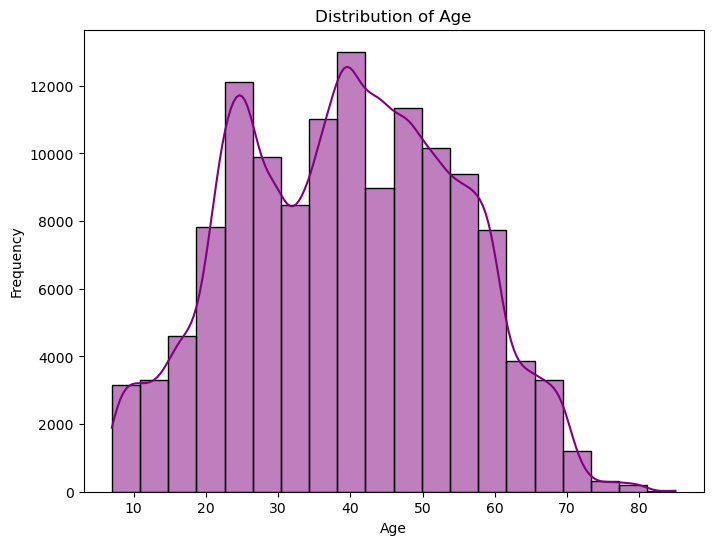

In [15]:
plt.figure(figsize = (8, 6))
sns.histplot(airline['Age'], bins = 20, kde = True, color = 'purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Count of Gender

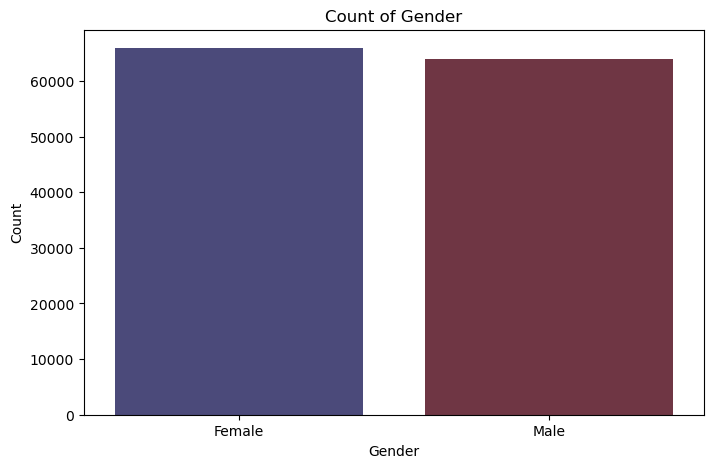

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=airline, palette='icefire')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

## Age by Class & Gender

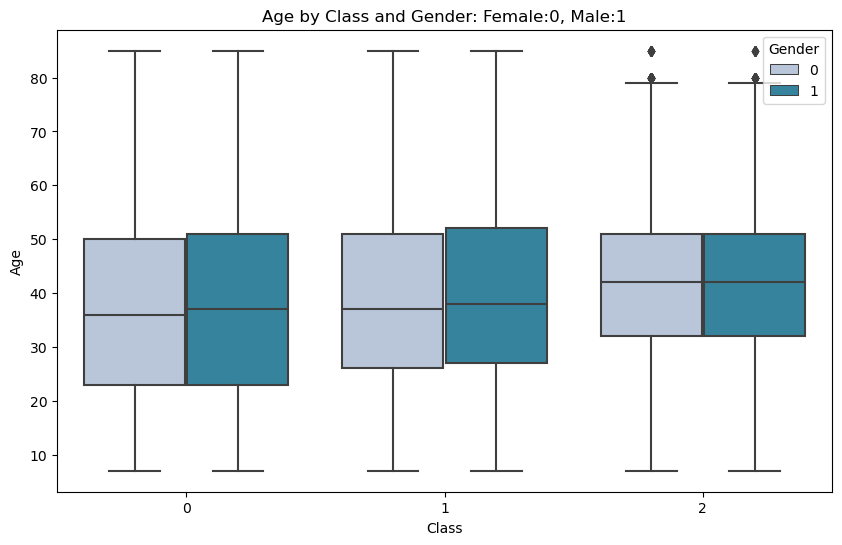

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', hue='Gender', data=airline, palette = 'PuBuGn')
plt.title('Age by Class and Gender: Female:0, Male:1')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

## Count of Customer Type

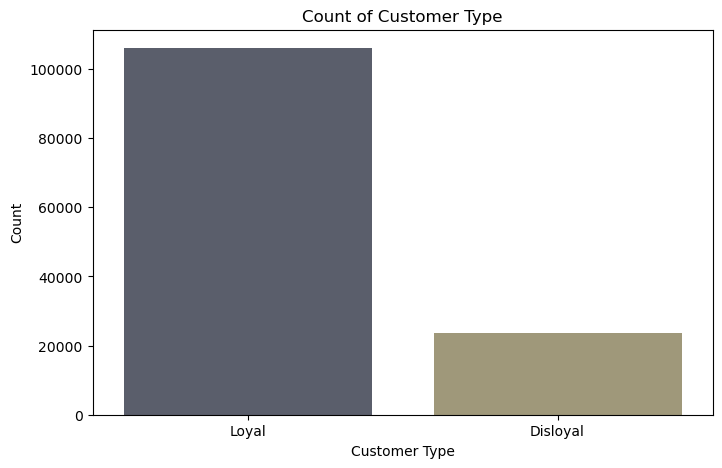

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Type', data=airline, palette='cividis')
plt.title('Count of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Loyal', 'Disloyal'])
plt.show()

# Correlation

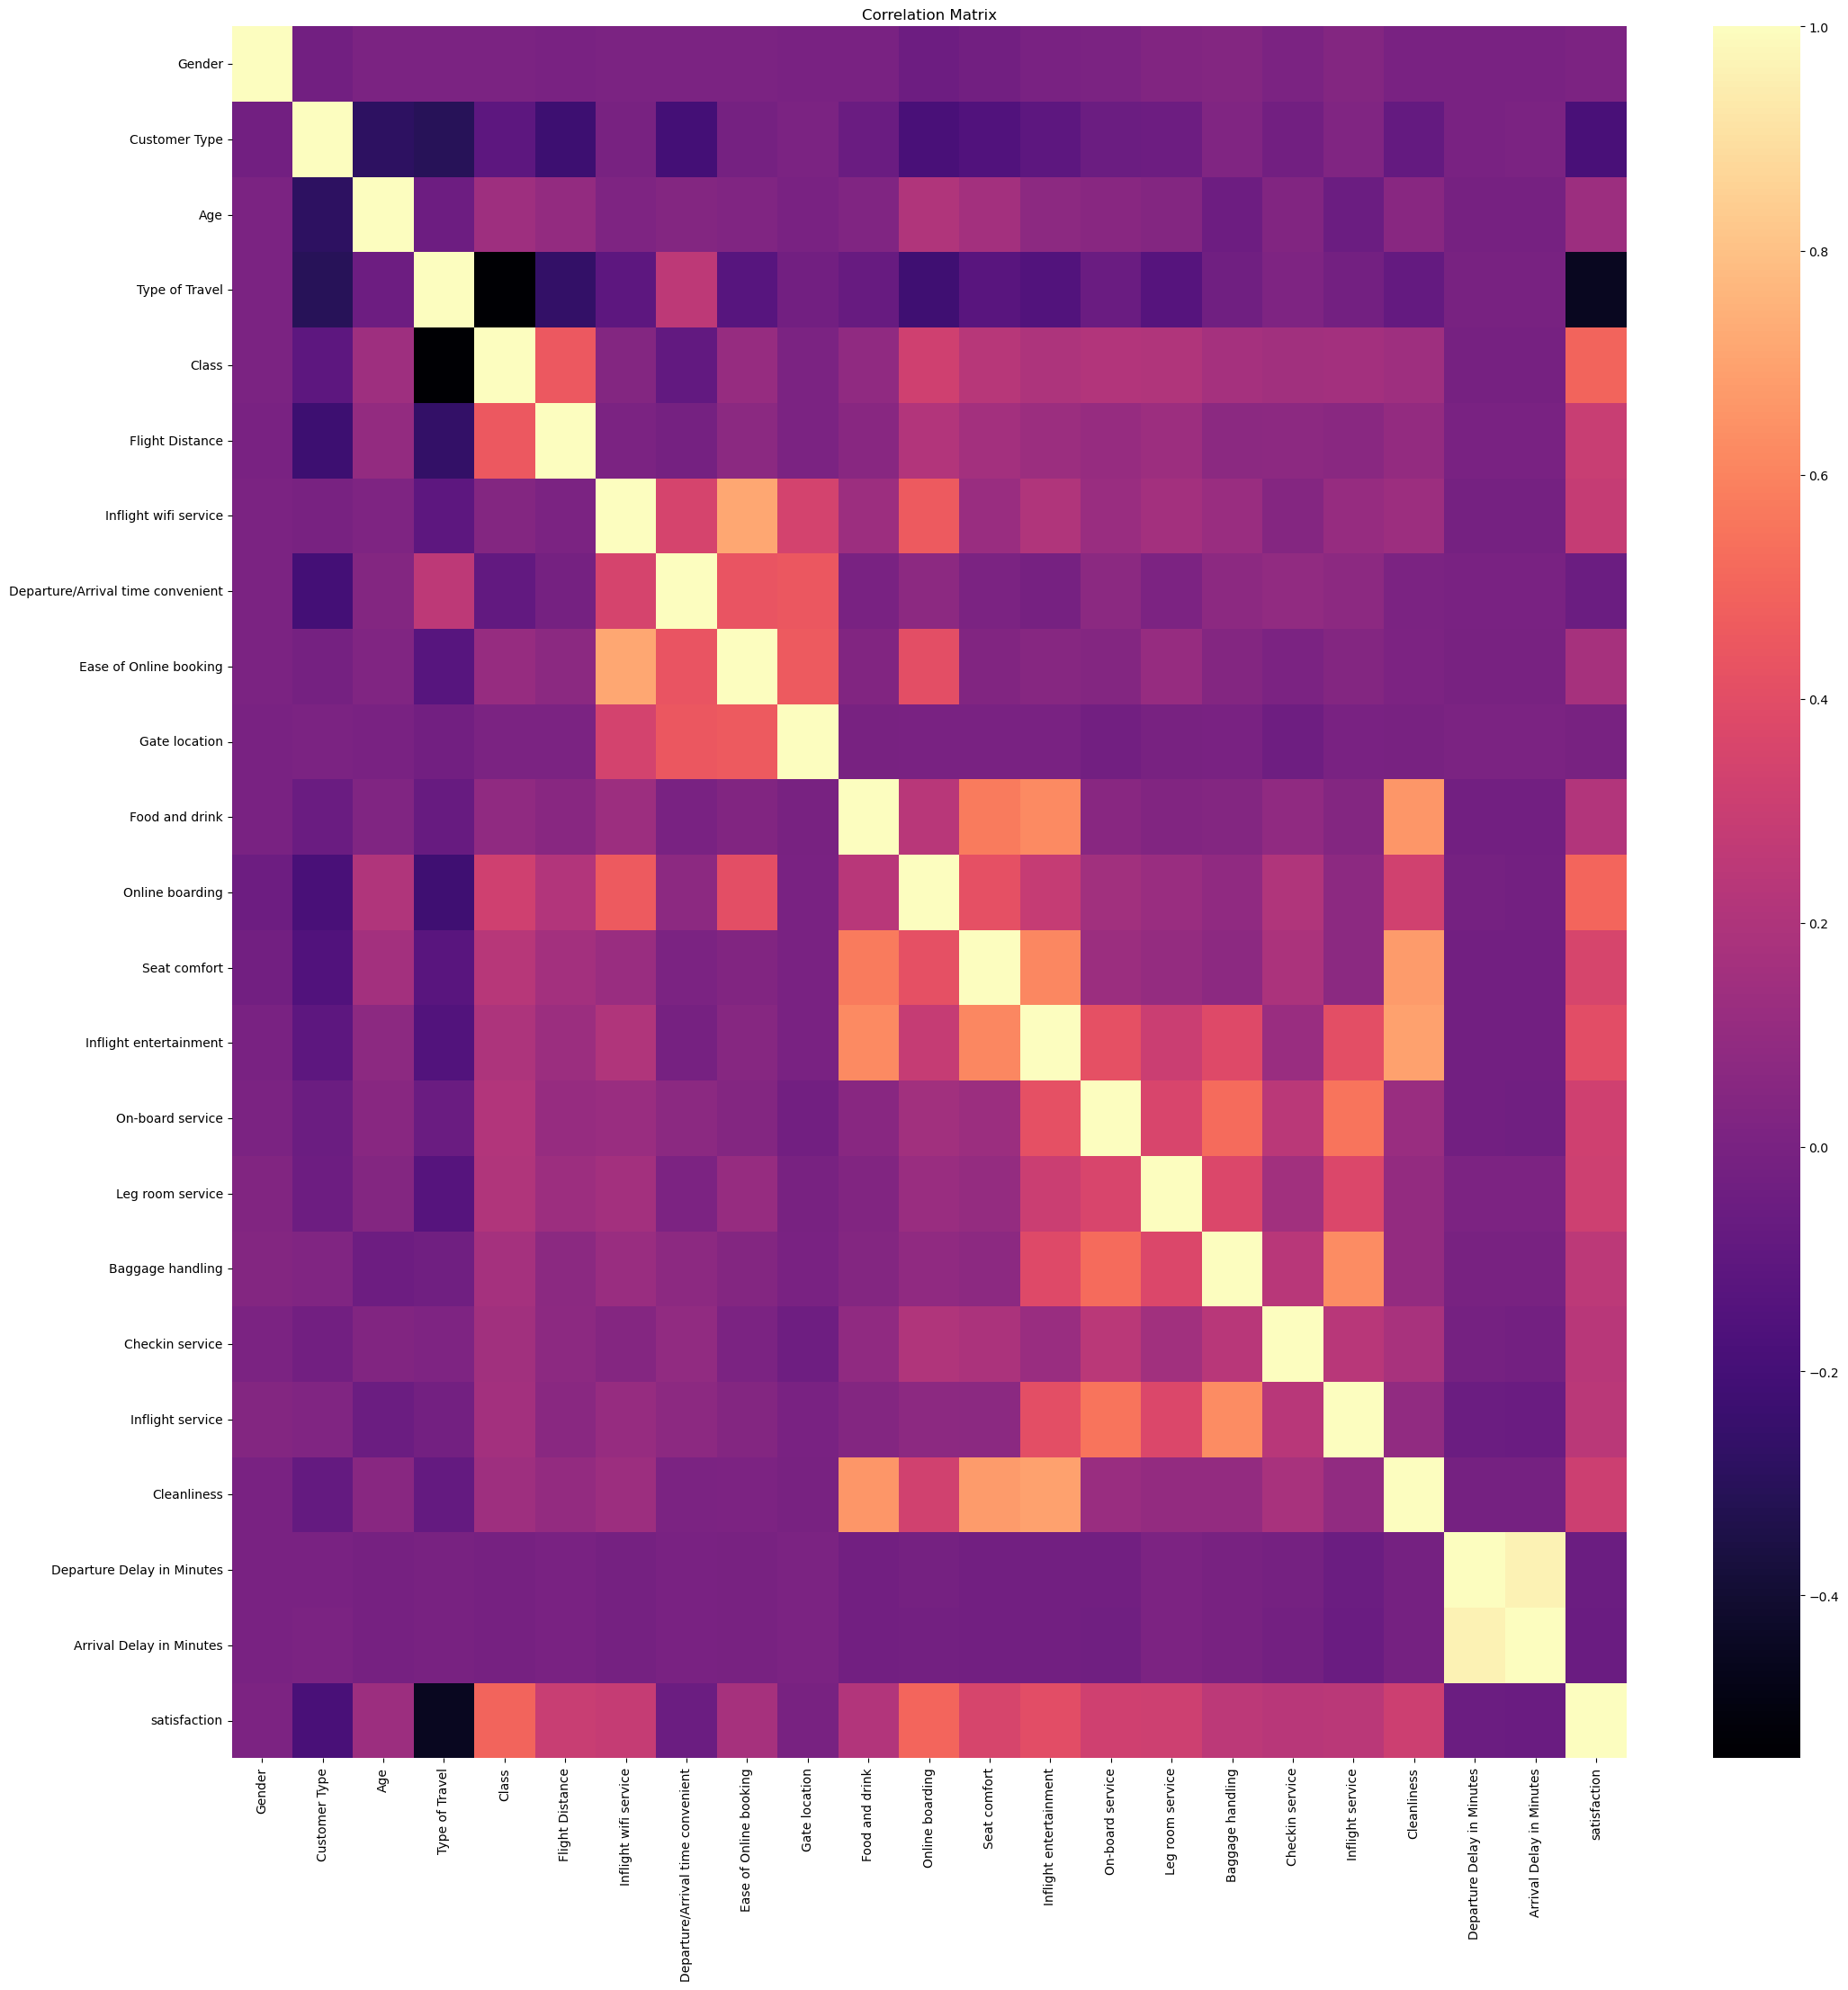

In [19]:
correlation_matrix = airline.corr()

#plot
plt.figure(figsize = (25, 25))
sns.heatmap(correlation_matrix, cmap = 'magma')
plt.title('Correlation Matrix')
plt.show()
#correlation matrix

# Overall model comparision for the entire data

### Test-Train Split (40:60)

In [20]:
X = airline.drop(['satisfaction'],axis = 1)
y = airline['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Logistic Classifier

In [21]:
#logistic regression
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
log_model.fit(X_train, y_train)

#calculate accuracy
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy of Logistic Regression:", accuracy_log)

Accuracy of Logistic Regression: 0.8049738219895288


### Decision Tree Classifier

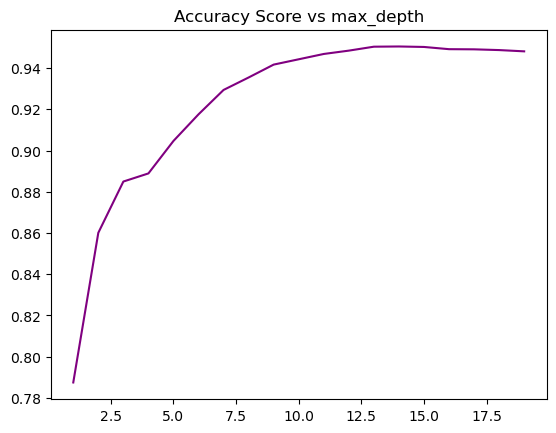

In [22]:
#check which depth to use
scores_list = []
depth_list = np.arange(1,20,1)
for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth = depth, criterion = 'gini', random_state = 0)
    scores = cross_val_score(dt, X_train, y_train, cv = 10,scoring = 'accuracy')
    scores_list.append(scores.mean())

#plot
plt.plot(depth_list, scores_list,  color = 'purple', markerfacecolor = 'black',label = 'Score')
plt.title('Accuracy Score vs max_depth')
plt.show()

In [23]:
# for max accuracy depth
max_value = max(scores_list)
max_index = scores_list.index(max_value)
max_index

13

In [24]:
dt = DecisionTreeClassifier(max_depth = 13, criterion = "gini", random_state = 0)
dt_model = dt.fit(X_train, y_train)

#calculate accuracy
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

Accuracy of Decision Tree: 0.9531683092085002


### Bagging Classifier

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0)
clf_bag.fit(X_train_scaled, y_train)
y_pred_bag = clf_bag.predict(X_test_scaled)

#calculate accuracy
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Accuracy of Bagging Classifier:", accuracy_bag)

Accuracy of Bagging Classifier: 0.9584616569140745


### Random Forest Classifier

In [26]:
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rand_forest_model.fit(X_train, y_train)

#calculate accuracy
y_pred_rand_forest = rand_forest_model.predict(X_test)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
print("Accuracy of Random Forest:", accuracy_rand_forest)

Accuracy of Random Forest: 0.9622343701878657


### GB Classifier

In [27]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbc.fit(X_train, y_train)

#calculate accuracy
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Accuracy of GB Classifier:", accuracy_gbc)

Accuracy of GB Classifier: 0.943505543578688


### KNN Classifier

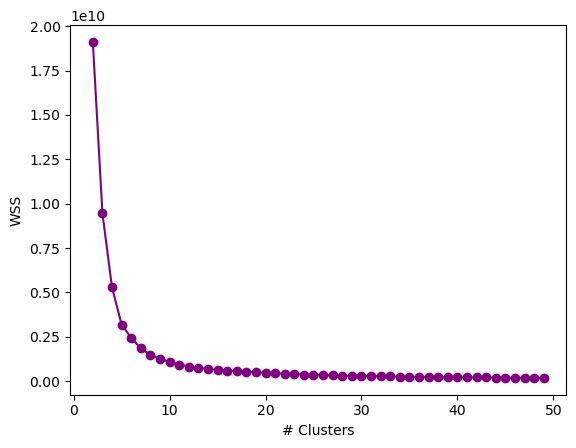

In [28]:
#k-means
cluster_range = range(2,50)
cluster_wss = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(X_train)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o', color = 'purple')
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X, y)

#calculate accuracy
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 0.8247420696027102


### Comparing all the models on overall data

In [30]:
#to keep decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state =0).fit(X_train, y_train)

#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.31,0.05,95.96,0.11
2,Bagging Classifier,98.91,0.10,95.53,0.12
4,Gradient Boosting Classifier,98.77,0.07,94.17,0.19
1,Decision Tree Classifier,96.80,0.07,94.75,0.17
0,Logistic Regression,85.97,1.06,79.69,1.10
5,KNN,78.88,0.13,73.37,0.13


### Best model for overall data = Random Forest Classifier

# Subsetting data by Class

## Business Class

In [31]:
business = airline[airline['Class'] == 2]
business.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
6,0,0,77,0,2,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
7,0,0,43,0,2,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1
9,0,0,46,0,2,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14.0,1


### Test-Train Split (40:60)

In [32]:
X = business.drop(['satisfaction'], axis = 1)
y = business['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [33]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion = 'gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)

#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.55,0.02,97.19,0.09
2,Bagging Classifier,99.25,0.07,96.79,0.15
4,Gradient Boosting Classifier,99.09,0.05,95.53,0.24
1,Decision Tree Classifier,96.46,0.63,95.77,0.18
0,Logistic Regression,88.19,0.89,81.67,0.62
5,KNN,73.12,0.20,72.60,0.29


### Best model for Business class data = Random Forest Classifier

### Confusion Matrix

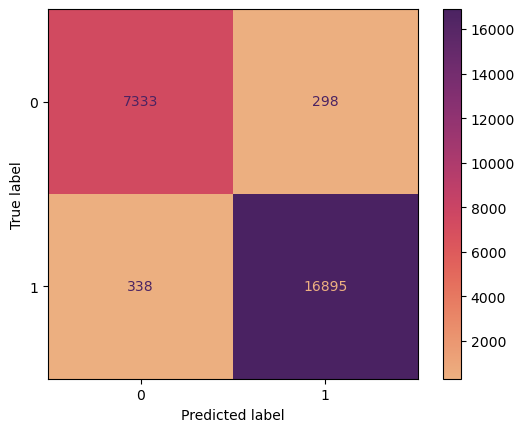

In [34]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare')
plt.show()

## Economy Class

In [35]:
economy = airline[airline['Class'] == 0]
economy.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
5,1,0,16,0,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
8,1,0,47,0,0,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,1


### Test-Train Split (40:60)

In [36]:
X = economy.drop(['satisfaction'], axis = 1)
y = economy['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [37]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,98.12,0.11,94.51,0.17
4,Gradient Boosting Classifier,98.03,0.05,94.03,0.27
2,Bagging Classifier,97.35,0.08,94.56,0.14
1,Decision Tree Classifier,95.85,0.28,94.13,0.14
0,Logistic Regression,81.10,0.44,86.33,0.58
5,KNN,66.12,0.30,81.80,0.21


### Best model for Economy Class data = Random Forest Classifier

### Confusion Matrix

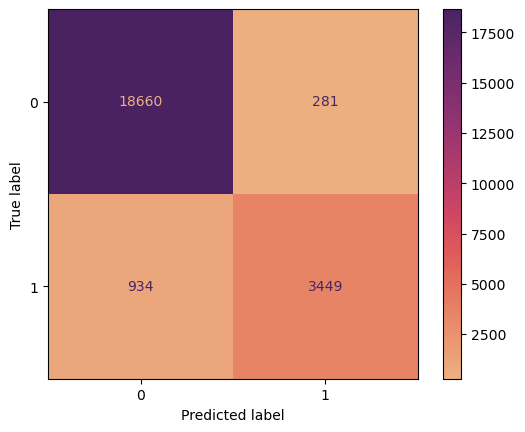

In [38]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Economy Plus Class

In [39]:
economy_plus = airline[airline['Class'] == 1]
economy_plus.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
17,1,0,52,1,1,1075,5,4,5,3,...,4,3,5,5,4,5,4,0,0.0,1
44,0,0,36,0,1,267,2,3,3,3,...,2,1,1,3,4,4,2,59,55.0,0
50,0,0,58,1,1,990,3,5,2,3,...,1,1,2,1,5,1,3,0,0.0,0
65,0,0,53,1,1,964,1,5,1,2,...,4,4,1,4,5,4,4,6,0.0,0
74,0,1,26,0,1,913,1,2,2,2,...,4,3,2,1,1,4,4,0,0.0,0


### Test-Train Split (40:60)

In [40]:
X = economy_plus.drop(['satisfaction'], axis = 1)
y = economy_plus['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [41]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,98.22,0.14,94.01,0.11
3,Random Forest Classifier,97.97,0.03,93.66,0.35
2,Bagging Classifier,97.01,0.17,93.85,0.22
1,Decision Tree Classifier,95.53,0.41,92.99,0.41
0,Logistic Regression,84.19,0.89,84.77,0.73
5,KNN,60.12,0.65,73.34,0.30


### Best model for Economy Plus Class data = Gradient Boosting Classifier

### Confusion Matrix

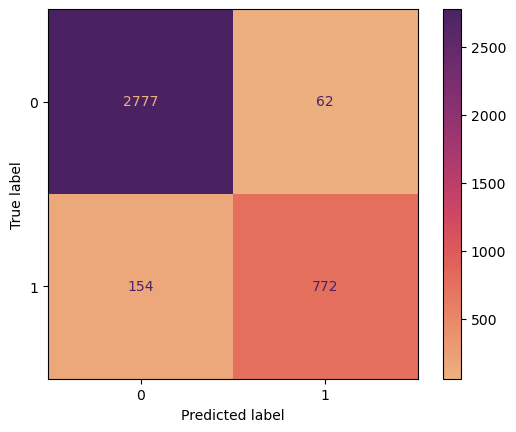

In [42]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

# Subsetting data by Gender

## Female data

In [43]:
female = airline[airline['Gender'] == 0]
female.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
6,0,0,77,0,2,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
7,0,0,43,0,2,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1


### Test-Train Split (40:60)

In [44]:
X = female.drop(['satisfaction'], axis = 1)
y = female['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [45]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.23,0.03,95.85,0.16
2,Bagging Classifier,98.85,0.09,95.58,0.20
4,Gradient Boosting Classifier,98.78,0.05,94.14,0.05
1,Decision Tree Classifier,96.65,0.11,94.68,0.08
0,Logistic Regression,86.07,0.23,80.57,0.34
5,KNN,76.36,0.54,71.54,0.39


### Best model for Female data = Random Forest Classifier

### Confusion Matrix

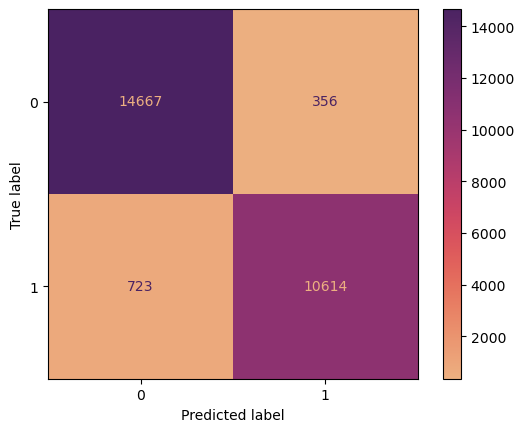

In [46]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Male data

In [47]:
male = airline[airline['Gender'] == 1]
male.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
5,1,0,16,0,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
8,1,0,47,0,0,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,1
15,1,0,50,1,0,83,3,4,0,3,...,2,4,2,4,4,5,2,5,2.0,0


### Test-Train Split (40:60)

In [48]:
X = male.drop(['satisfaction'], axis = 1)
y = male['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [49]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.22,0.03,95.69,0.10
2,Bagging Classifier,98.83,0.06,95.48,0.12
4,Gradient Boosting Classifier,98.80,0.02,94.22,0.04
1,Decision Tree Classifier,96.32,0.20,94.36,0.17
0,Logistic Regression,87.99,0.51,81.46,0.85
5,KNN,76.63,0.11,71.47,0.10


### Best model for Male data = Random Forest Classifier

### Confusion Matrix

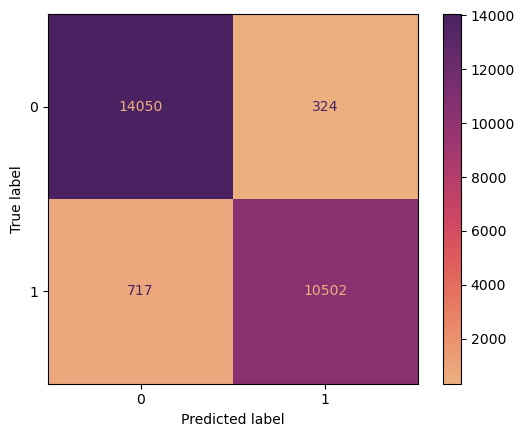

In [50]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

# Subsetting data by Age

## Age group 1: 6 - 18

In [51]:
age_1 = airline[(airline['Age'] > 6) & (airline['Age'] <= 18)]
age_1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
5,1,0,16,0,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
35,1,0,12,1,0,674,3,4,3,1,...,1,3,3,5,4,4,1,80,70.0,0
108,0,0,7,1,0,1120,3,5,3,3,...,2,4,4,4,5,5,2,16,13.0,0
130,0,0,17,1,0,89,3,4,3,1,...,5,3,4,5,5,5,5,0,0.0,0
131,1,0,15,1,1,192,2,4,2,3,...,5,5,4,5,5,5,5,5,8.0,0


### Test-Train Split (40:60)

In [52]:
X = age_1.drop(['satisfaction'], axis = 1)
y = age_1['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [53]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,98.46,0.21,95.23,0.29
3,Random Forest Classifier,98.22,0.19,95.08,0.32
1,Decision Tree Classifier,97.69,0.35,94.47,0.17
2,Bagging Classifier,97.42,0.33,94.60,0.37
0,Logistic Regression,81.14,0.33,86.28,1.02
5,KNN,65.50,1.14,81.78,0.85


### Best model for Age group 1 data = Gradient Boosting Classifier

### Confusion Matrix

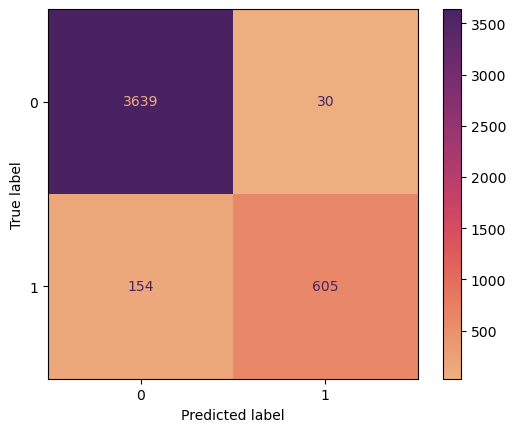

In [54]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 2: 19 - 24

In [55]:
age_2 = airline[(airline['Age'] > 18) & (airline['Age'] <= 24)]
age_2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
26,1,0,24,0,2,3680,4,1,4,4,...,2,5,5,5,5,4,2,0,0.0,1
27,0,0,22,0,0,1521,4,1,1,1,...,4,1,4,1,1,5,4,3,13.0,1
33,1,0,22,1,0,1846,4,5,4,4,...,5,5,4,4,4,4,5,40,68.0,0
41,1,1,24,0,0,725,4,4,4,2,...,2,4,2,3,1,5,2,0,4.0,1


### Test-Train Split (40:60)

In [56]:
X = age_2.drop(['satisfaction'], axis = 1)
y = age_2['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [57]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,98.81,0.06,94.57,0.11
4,Gradient Boosting Classifier,98.80,0.08,94.15,0.17
2,Bagging Classifier,98.13,0.27,93.42,0.41
1,Decision Tree Classifier,96.46,0.48,93.29,0.53
0,Logistic Regression,84.45,0.62,81.30,0.57
5,KNN,68.74,0.74,68.08,0.55


### Best model for Age group 2 data = Random Forest Classifier

### Confusion Matrix

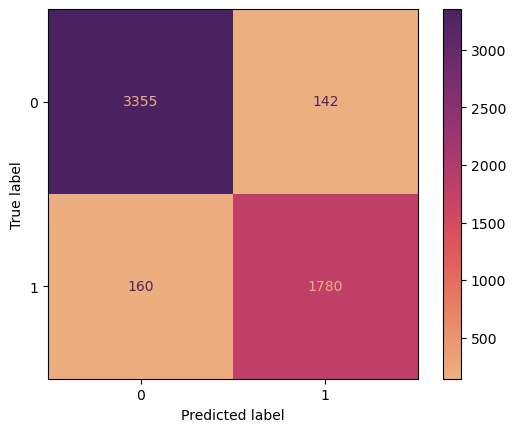

In [58]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 3: 25 - 34

In [59]:
age_3 = airline[(airline['Age'] > 25) & (airline['Age'] <= 34)]
age_3.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
11,0,0,33,0,2,325,2,5,5,5,...,2,2,2,2,3,2,4,18,7.0,0
16,0,0,31,0,0,728,2,5,5,5,...,2,4,3,3,4,3,2,2,0.0,0
24,0,1,30,0,0,528,4,3,5,3,...,2,3,2,3,4,4,2,0,0.0,0
38,0,1,32,0,2,802,4,4,4,2,...,2,4,2,4,3,5,2,0,10.0,0
43,0,0,28,0,2,1024,1,1,1,1,...,4,5,3,5,5,4,4,0,3.0,1


### Test-Train Split (40:60)

In [60]:
X = age_3.drop(['satisfaction'], axis = 1)
y = age_3['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [61]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.17,0.04,95.69,0.07
4,Gradient Boosting Classifier,99.00,0.08,94.41,0.22
2,Bagging Classifier,98.76,0.09,95.26,0.22
1,Decision Tree Classifier,96.40,0.27,94.32,0.25
0,Logistic Regression,88.52,0.85,83.88,0.76
5,KNN,73.09,0.30,71.11,0.33


### Best model for Age group 3 data = Random Forest Classifier

### Confusion Matrix

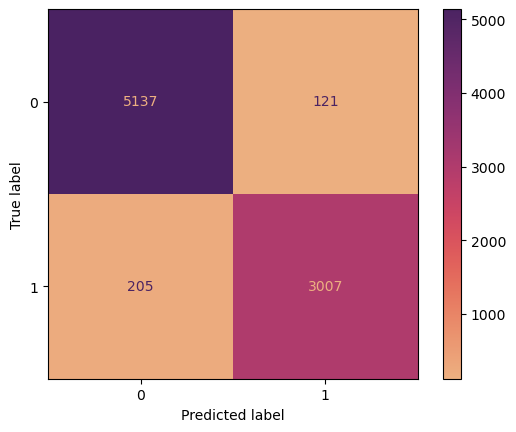

In [62]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 4: 35 - 44

In [63]:
age_4 = airline[(airline['Age'] > 35) & (airline['Age'] <= 44)]
age_4.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
7,0,0,43,0,2,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1
18,0,0,43,1,0,1927,3,4,3,1,...,5,5,3,5,4,5,3,0,0.0,0
21,1,0,43,1,0,1437,3,4,3,4,...,2,4,2,4,4,5,2,0,0.0,0


### Test-Train Split (40:60)

In [64]:
X = age_4.drop(['satisfaction'], axis = 1)
y = age_4['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [65]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,98.85,0.07,94.97,0.23
4,Gradient Boosting Classifier,98.56,0.06,93.79,0.19
2,Bagging Classifier,98.36,0.10,94.79,0.33
1,Decision Tree Classifier,96.65,0.21,94.15,0.15
0,Logistic Regression,90.80,0.34,82.92,0.41
5,KNN,76.41,0.44,70.89,0.42


### Best model for Age group 4 data = Random Forest Classifier

### Confusion Matrix

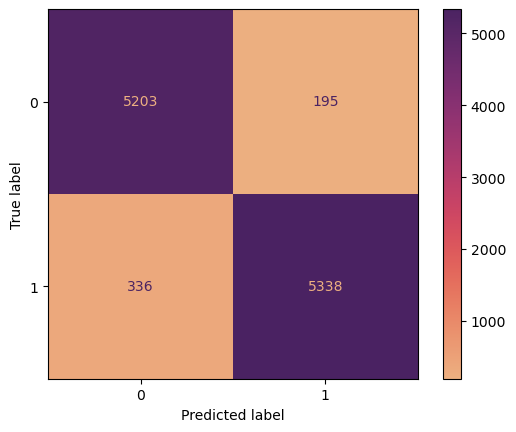

In [66]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 5: 45 - 54

In [67]:
age_5 = airline[(airline['Age'] > 45) & (airline['Age'] <= 54)]
age_5.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
8,1,0,47,0,0,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,1
9,0,0,46,0,2,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14.0,1
10,0,0,47,0,0,1235,4,1,1,1,...,3,3,4,3,1,3,4,29,19.0,1


### Test-Train Split (40:60)

In [68]:
X = age_5.drop(['satisfaction'], axis = 1)
y = age_5['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [69]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.20,0.12,95.59,0.38
4,Gradient Boosting Classifier,98.98,0.15,94.84,0.26
2,Bagging Classifier,98.90,0.22,95.45,0.32
1,Decision Tree Classifier,97.21,0.38,94.77,0.27
0,Logistic Regression,93.29,0.58,86.20,0.68
5,KNN,77.63,0.54,71.59,0.74


### Best model for Age group 5 data = Random Forest Classifier

### Confusion Matrix

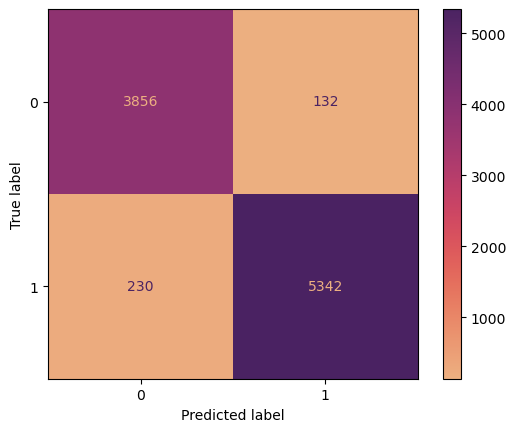

In [70]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 6: 55 - 64

In [71]:
age_6 = airline[(airline['Age'] > 55) & (airline['Age'] <= 64)]
age_6.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
13,0,0,60,0,2,451,1,1,4,1,...,5,5,5,5,3,5,5,117,113.0,1
20,1,0,60,0,2,612,4,4,4,4,...,5,5,5,5,5,5,5,21,49.0,1
25,1,0,62,1,0,710,3,5,3,4,...,2,3,5,5,4,4,2,0,0.0,0
31,0,0,56,0,0,308,2,3,3,3,...,2,2,2,2,2,2,2,0,0.0,1
45,0,0,62,0,0,550,5,1,1,1,...,5,5,5,5,5,5,2,92,90.0,1


### Test-Train Split (40:60)

In [72]:
X = age_6.drop(['satisfaction'], axis = 1)
y = age_6['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [73]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,99.19,0.12,95.49,0.40
3,Random Forest Classifier,99.07,0.18,95.55,0.42
2,Bagging Classifier,98.79,0.08,95.42,0.21
1,Decision Tree Classifier,95.98,0.11,94.45,0.22
0,Logistic Regression,93.41,0.18,87.34,0.31
5,KNN,76.55,0.06,70.95,0.24


### Best model for Age group 6 data = Gradient Boosting Classifier

### Confusion Matrix

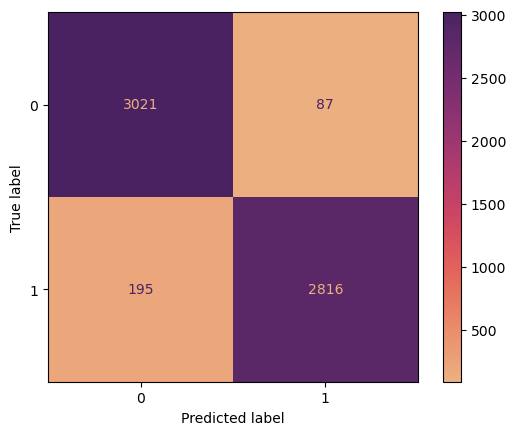

In [74]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Age group 7: above 65

In [75]:
age_7 = airline[(airline['Age'] >= 65)]
age_7.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6,0,0,77,0,2,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
57,0,0,67,1,0,626,3,4,3,1,...,3,3,3,3,3,3,5,0,0.0,0
61,0,0,70,1,0,1829,1,4,1,1,...,5,5,1,5,4,5,3,0,0.0,0
63,1,0,66,0,0,404,4,1,1,1,...,4,3,1,3,2,5,4,9,6.0,1
67,0,0,69,1,0,872,2,3,2,2,...,5,5,2,5,3,5,3,14,0.0,0


### Test-Train Split (40:60)

In [76]:
X = age_7.drop(['satisfaction'], axis = 1)
y = age_7['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [77]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,98.25,0.18,94.76,0.22
3,Random Forest Classifier,97.55,0.29,94.62,0.35
2,Bagging Classifier,96.87,0.59,94.40,0.36
1,Decision Tree Classifier,93.48,1.86,93.54,0.62
0,Logistic Regression,83.89,0.92,87.46,0.42
5,KNN,61.17,0.60,79.99,0.41


### Best model for Age group 7 data = Gradient Boosting Classifier

### Confusion Matrix

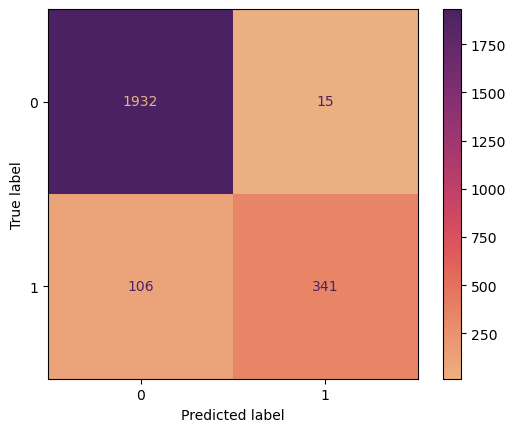

In [78]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

# Subsetting data by Type of Travel

## Business Travel

In [79]:
btravel = airline[airline['Type of Travel'] == 0]
btravel.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


### Test-Train Split (40:60)

In [80]:
X = btravel.drop(['satisfaction'], axis = 1)
y = btravel['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [81]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.37,0.06,96.25,0.15
2,Bagging Classifier,98.93,0.15,95.80,0.20
4,Gradient Boosting Classifier,98.75,0.08,94.26,0.22
1,Decision Tree Classifier,95.39,0.12,94.98,0.20
0,Logistic Regression,85.83,1.64,78.15,1.89
5,KNN,77.71,0.37,71.74,0.08


### Best model for Business Travel data = Random Forest Classifier

### Confusion Matrix

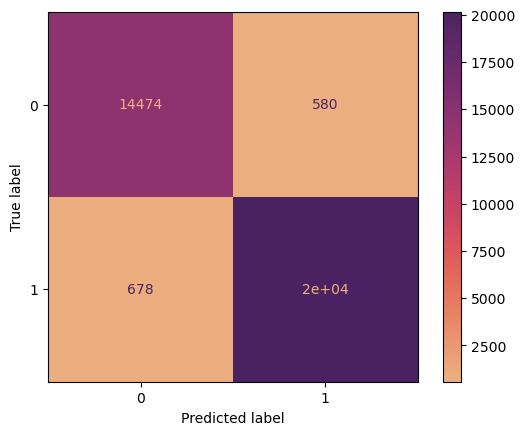

In [82]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Personal Travel

In [83]:
ptravel = airline[airline['Type of Travel'] == 1]
ptravel.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
15,1,0,50,1,0,83,3,4,0,3,...,2,4,2,4,4,5,2,5,2.0,0
17,1,0,52,1,1,1075,5,4,5,3,...,4,3,5,5,4,5,4,0,0.0,1
18,0,0,43,1,0,1927,3,4,3,1,...,5,5,3,5,4,5,3,0,0.0,0
21,1,0,43,1,0,1437,3,4,3,4,...,2,4,2,4,4,5,2,0,0.0,0
22,1,0,55,1,0,302,1,2,4,3,...,4,1,3,2,4,3,4,0,0.0,0


### Test-Train Split (40:60)

In [84]:
X = ptravel.drop(['satisfaction'], axis = 1)
y = ptravel['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [85]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,97.83,0.07,95.80,0.32
3,Random Forest Classifier,97.64,0.06,95.72,0.34
2,Bagging Classifier,96.55,0.25,95.32,0.24
1,Decision Tree Classifier,79.37,1.20,95.80,0.32
0,Logistic Regression,74.35,1.73,90.36,0.51
5,KNN,58.49,0.62,89.76,0.27


### Best model for Personal Travel data = Gradient Boosting Classifier

### Confusion Matrix

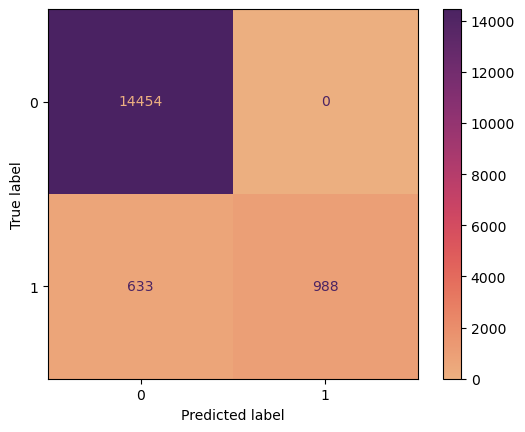

In [86]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

# Subsetting by Customer Type

## Loyal Customer

In [87]:
loyal = airline[airline['Customer Type'] == 0]
loyal.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
3,1,0,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
5,1,0,16,0,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


### Test-Train Split (40:60)

In [88]:
X = loyal.drop(['satisfaction'], axis = 1)
y = loyal['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [89]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest Classifier,99.46,0.04,96.67,0.12
2,Bagging Classifier,99.16,0.07,96.37,0.05
4,Gradient Boosting Classifier,99.12,0.06,95.17,0.16
1,Decision Tree Classifier,97.24,0.26,95.70,0.08
0,Logistic Regression,88.61,0.24,81.93,0.43
5,KNN,79.89,0.21,73.37,0.26


### Best model for Loyal Customer data = Random Forest Classifier

### Confusion Matrix

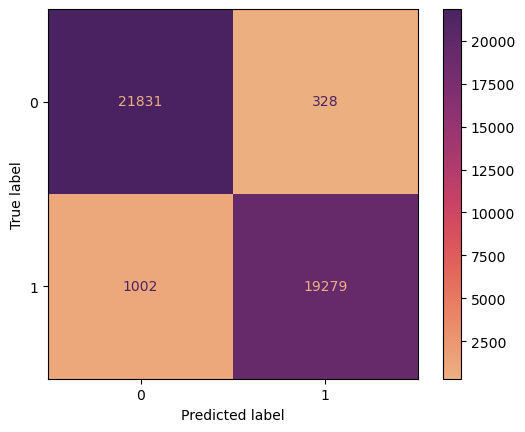

In [90]:
y_pred_rand_forest = rand_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rand_forest, labels = rand_forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rand_forest_model.classes_)
disp.plot(cmap = 'flare') 
plt.show()

## Disloyal Customer

In [91]:
disloyal = airline[airline['Customer Type'] == 1]
disloyal.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
24,0,1,30,0,0,528,4,3,5,3,...,2,3,2,3,4,4,2,0,0.0,0
32,1,1,41,0,0,624,2,3,2,4,...,5,4,3,3,1,4,5,0,0.0,0
38,0,1,32,0,2,802,4,4,4,2,...,2,4,2,4,3,5,2,0,10.0,0
40,0,1,42,0,2,373,3,3,3,5,...,4,3,2,5,5,5,4,0,0.0,0


### Test-Train Split (40:60)

In [92]:
X = disloyal.drop(['satisfaction'], axis = 1)
y = disloyal['satisfaction']
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

### Comparing all the models

In [93]:
#log
log_model = LogisticRegression(random_state = 0).fit(X_train, y_train)
#decision tree score
depth_list = np.arange(1, 20, 1)
scores_list = [cross_val_score(DecisionTreeClassifier(max_depth = depth, criterion='gini', random_state = 0), 
                               X_train, y_train, cv = 10, scoring = 'accuracy').mean() for depth in depth_list]
best_depth = max(range(len(scores_list)), key = lambda x: scores_list[x]) + 1
dt_model = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini", random_state = 0).fit(X_train, y_train)
#bagging
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_bag = BaggingClassifier(n_estimators = 10, random_state = 0).fit(X_train_scaled, y_train)
#random forest
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
#gradient boosting
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
#knn
knn = KNeighborsClassifier(n_neighbors = 7).fit(X, y)


#for comparing all the models
models = []
models.append(('Logistic Regression', log_model))
models.append(('Decision Tree Classifier', dt_model))
models.append(('Bagging Classifier', clf_bag))
models.append(('Random Forest Classifier', rand_forest_model))
models.append(('Gradient Boosting Classifier', gbc))
models.append(('KNN', knn))

#evaluating model results
acc_results = []
auc_results = []
names = []

#set table to table to populate with perf results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)



#using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits = 3)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    #append
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

#results
model_results.sort_values(by = ['AUC Mean'], ascending = False)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Gradient Boosting Classifier,98.17,0.08,94.03,0.09
3,Random Forest Classifier,97.81,0.14,93.77,0.21
1,Decision Tree Classifier,97.47,0.15,93.84,0.16
2,Bagging Classifier,97.12,0.09,93.12,0.28
0,Logistic Regression,80.39,0.45,83.96,0.57
5,KNN,69.45,0.12,77.83,0.17


### Best model for Disloyal Customer data = Gradient Boosting Classifier

### Confusion Matrix

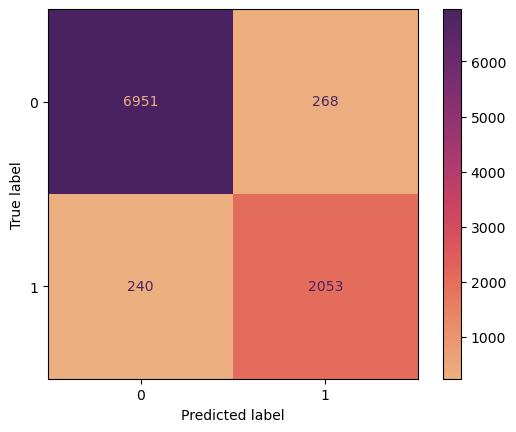

In [94]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'flare') 
plt.show()

# Business Decision Performance

- We are choosing the model that performs best for each subset and choosing the top 3 most important features (based on the model)
- Increasing the satisfaction by 1 for each of those features and predicting (based on test data) how many passengers that were initially dissatified, [since most of the model accuracies are above 97%, assuming the predictions are true] will be predicted as satisfied
- Then calculating the cost, profit and the cost profit ratio for each

## Assumed costs for increasing a variable by 1 unit

In [95]:
costs = {
    'Flight Distance': 400, 'Inflight wifi service': 80, 'Ease of Online booking': 60,
    'Gate location': 140, 'Food and drink': 100, 'Online boarding': 70, 'Seat comfort': 110,
    'Inflight entertainment': 50, 'On-board service': 30, 'Leg room service': 500,
    'Baggage handling': 20, 'Checkin service': 20, 'Inflight service': 40, 'Cleanliness': 20
}

## Assumed profit per changed customer

In [96]:
profit_per_change = 500

## For Class

### For Business Class: Random Forest Classifier

In [97]:
#business.head()
X = business.drop(['satisfaction'], axis = 1) 
y = business['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

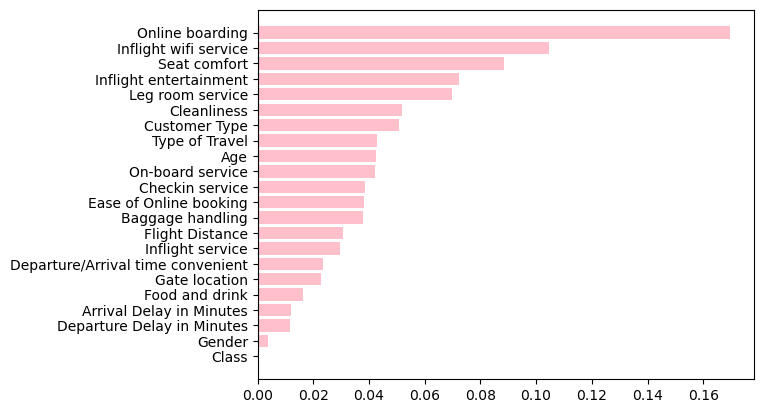

In [98]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [99]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Class', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [100]:
#training data again with the removed features
X = business.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = business['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

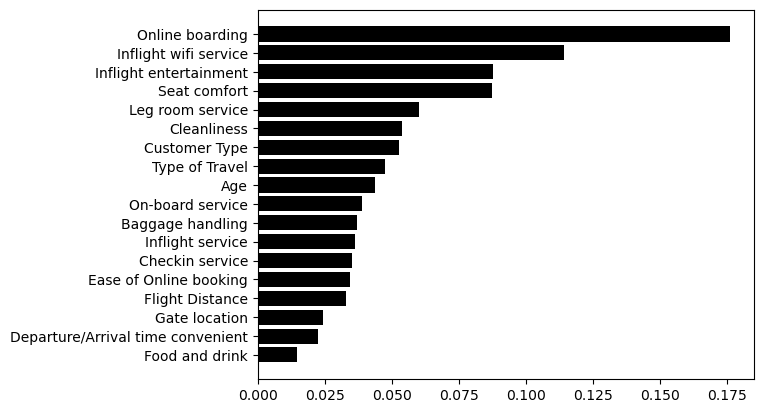

In [101]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [102]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [103]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_business_class = pd.DataFrame(table_data, columns=table_head)
results_business_class["Cost Benefit ($)"] = results_business_class["Total Profit ($)"]/results_business_class["Total Cost ($)"]
results_business_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Online boarding,1,70,150000,300,2142.857143
1,Inflight wifi service,1,80,320500,641,4006.250000
2,Inflight entertainment,1,50,162000,324,3240.000000


In [104]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

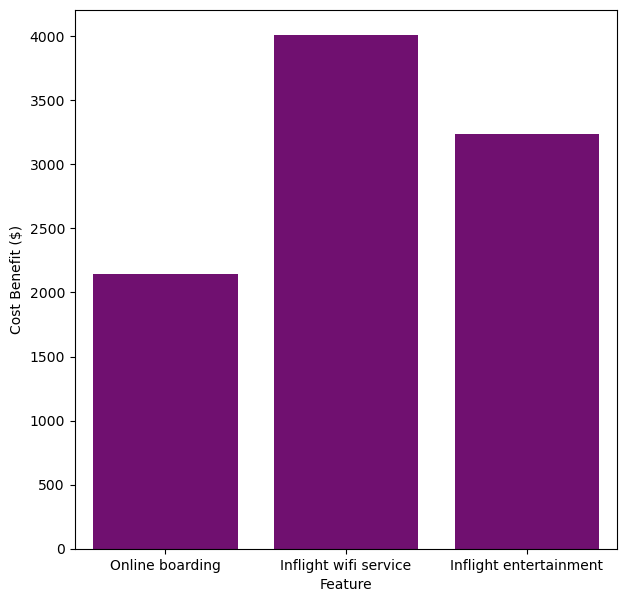

In [105]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_business_class, color='purple')

### For Economy Class: Random Forest Classifier 

In [106]:
X = economy.drop(['satisfaction'], axis = 1) 
y = economy['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

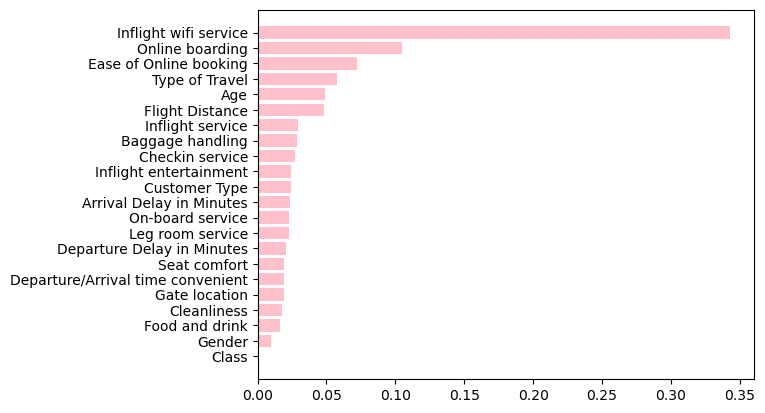

In [107]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [108]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Class', 'Gate location', 'Food and drink', 'Cleanliness']

In [109]:
#training data again with the removed features
X = economy.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = economy['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

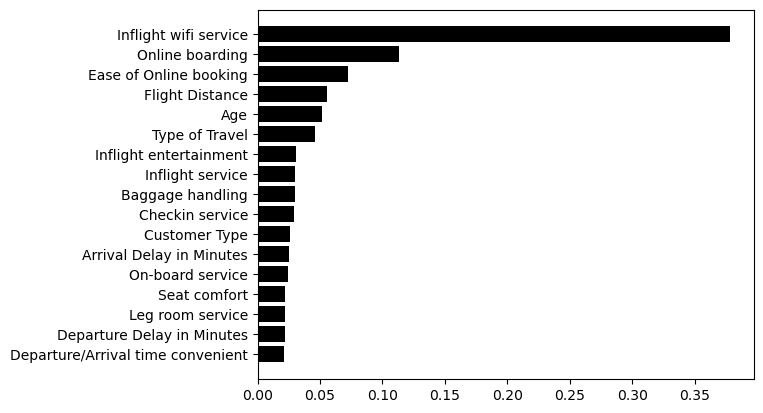

In [110]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [111]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [112]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_economy_class = pd.DataFrame(table_data, columns=table_head)
results_economy_class["Cost Benefit ($)"] = results_economy_class["Total Profit ($)"]/results_economy_class["Total Cost ($)"]
results_economy_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,500,1,6.250000
1,Online boarding,1,70,212500,425,3035.714286
2,Ease of Online booking,1,60,154000,308,2566.666667


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

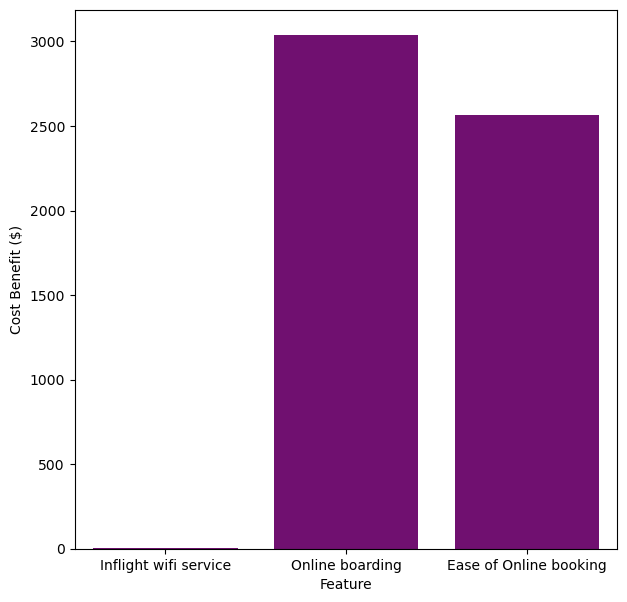

In [113]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_economy_class, color='purple')

### For Economy Plus Class: Gradient Boosting Classifier 

In [114]:
X = economy_plus.drop(['satisfaction'], axis = 1) #dropping no common class for non important stuff
y = economy_plus['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

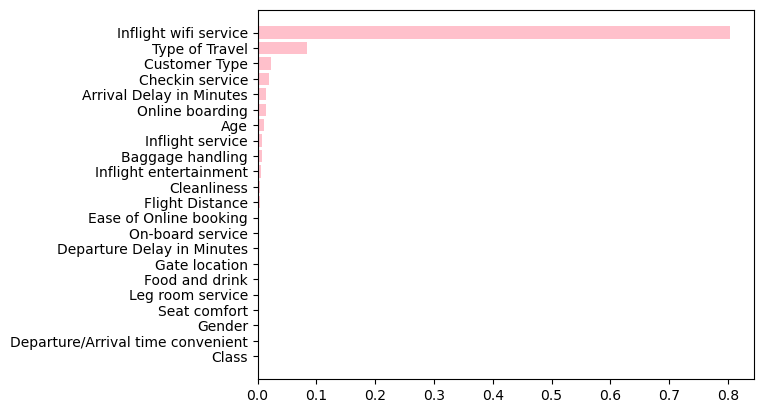

In [115]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [116]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Class',
 'Departure/Arrival time convenient',
 'Gate location',
 'Food and drink',
 'Seat comfort',
 'On-board service',
 'Leg room service',
 'Departure Delay in Minutes']

In [117]:
#training data again with the removed features
X = economy_plus.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = economy_plus['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

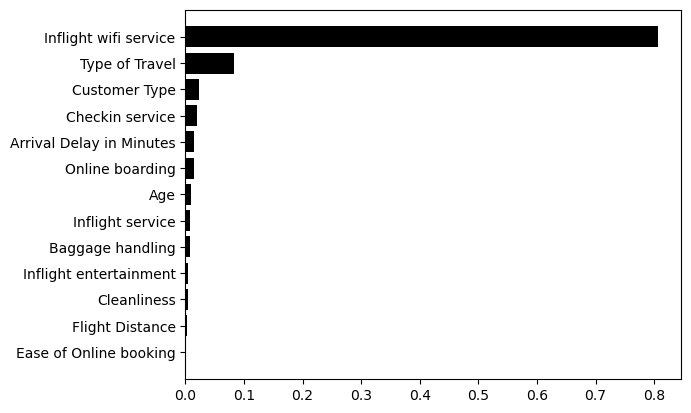

In [118]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [119]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [120]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_economy_plus_class = pd.DataFrame(table_data, columns=table_head)
results_economy_plus_class["Cost Benefit ($)"] = results_economy_plus_class["Total Profit ($)"]/results_economy_plus_class["Total Cost ($)"]
results_economy_plus_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,0,0,0.0
1,Type of Travel,1,0,1000,2,inf
2,Customer Type,1,0,2500,5,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

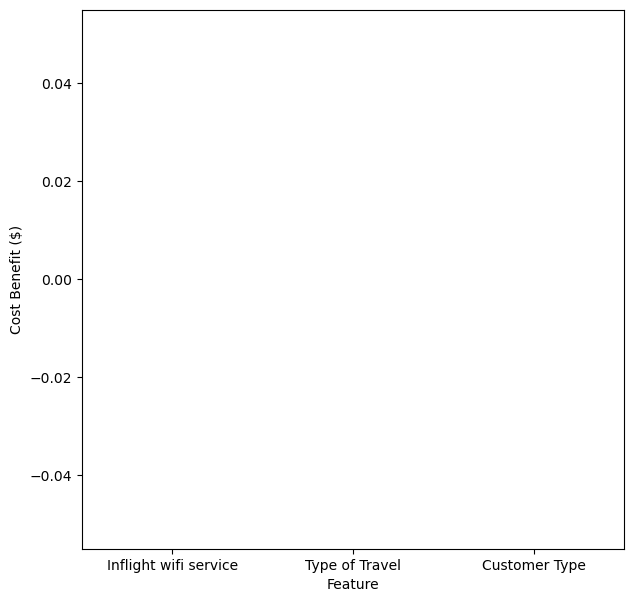

In [121]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_economy_plus_class, color='purple')

## For Gender

### For Female data: Random Forest Classifier 

In [122]:
X = female.drop(['satisfaction'], axis = 1) 
y = female['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

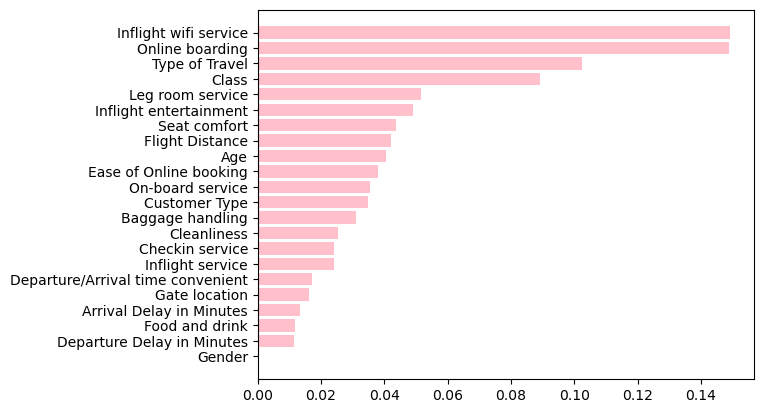

In [123]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [124]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Food and drink',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [125]:
#training data again with the removed features
X = female.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = female['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

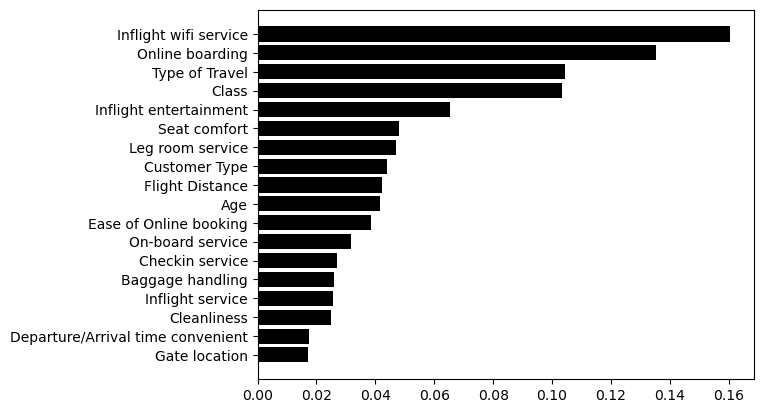

In [126]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [127]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [128]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_female_class = pd.DataFrame(table_data, columns=table_head)
results_female_class["Cost Benefit ($)"] = results_female_class["Total Profit ($)"]/results_female_class["Total Cost ($)"]
results_female_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,150000,300,1875.000000
1,Online boarding,1,70,229000,458,3271.428571
2,Type of Travel,1,0,39500,79,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

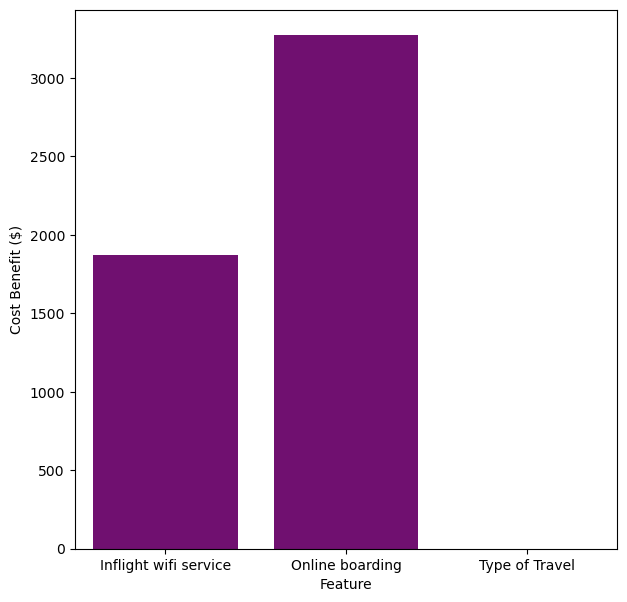

In [129]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_female_class, color='purple')

### For Male data: Random Forest Classifier 

In [130]:
X = male.drop(['satisfaction'], axis = 1) 
y = male['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

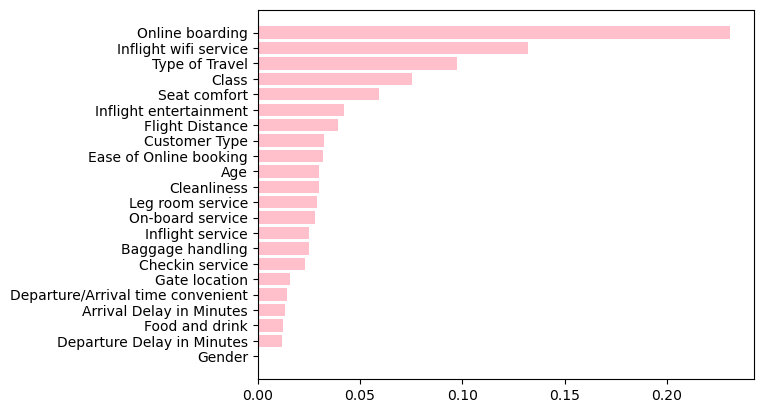

In [131]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [132]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Gate location',
 'Food and drink',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [133]:
#training data again with the removed features
X = male.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = male['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

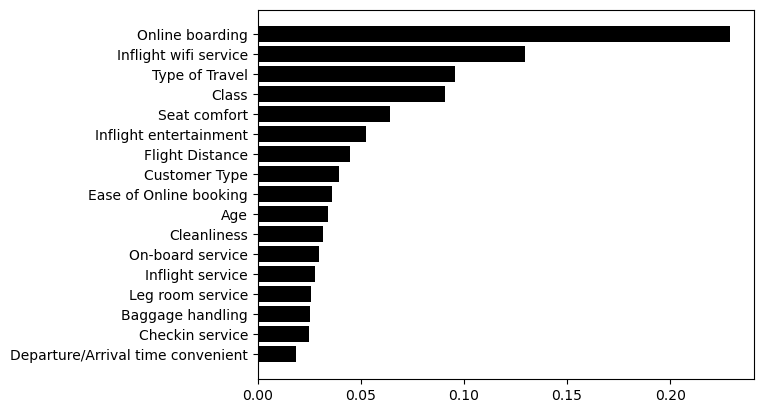

In [134]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [135]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [136]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_male_class = pd.DataFrame(table_data, columns=table_head)
results_male_class["Cost Benefit ($)"] = results_male_class["Total Profit ($)"]/results_male_class["Total Cost ($)"]
results_male_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Online boarding,1,70,104500,209,1492.857143
1,Inflight wifi service,1,80,207500,415,2593.750000
2,Type of Travel,1,0,50000,100,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

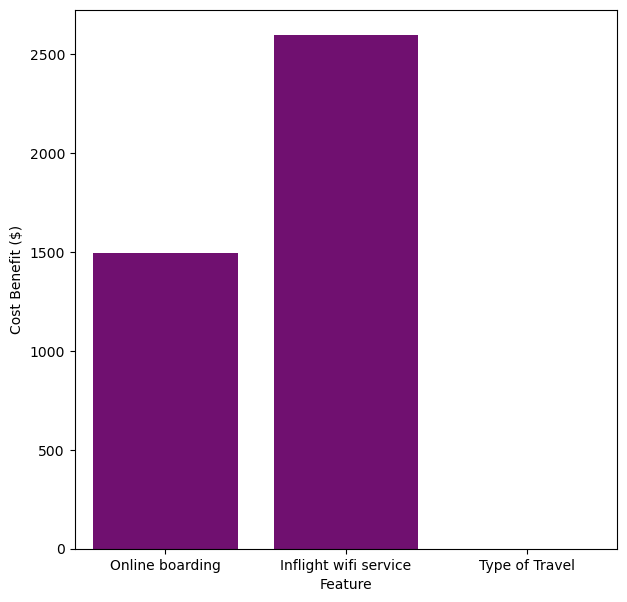

In [137]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_male_class, color='purple')

## For Age

### For Age group 1(6-18): Gradient Boosting Classifier 

In [138]:
X = age_1.drop(['satisfaction'], axis = 1) 
y = age_1['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

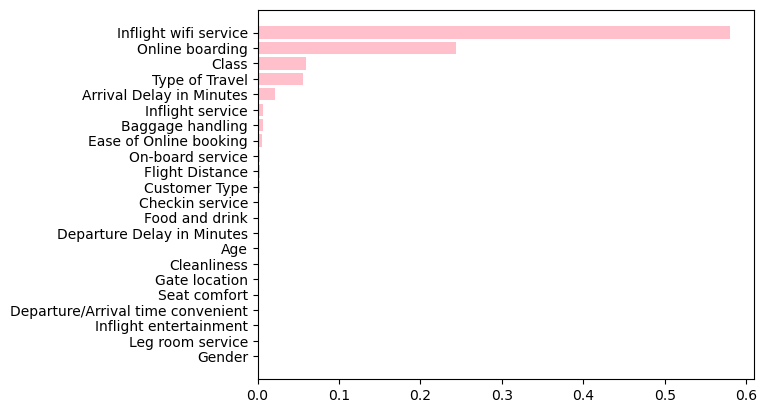

In [139]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [140]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Inflight entertainment', 'Leg room service']

In [141]:
#training data again with the removed features
X = age_1.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_1['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

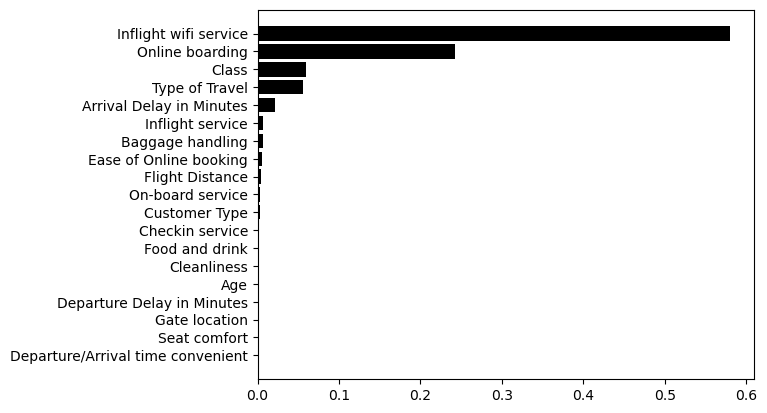

In [142]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [143]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [144]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_1_class = pd.DataFrame(table_data, columns=table_head)
results_age_1_class["Cost Benefit ($)"] = results_age_1_class["Total Profit ($)"]/results_age_1_class["Total Cost ($)"]
results_age_1_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,7000,14,87.5
1,Online boarding,1,70,3500,7,50.0
2,Class,1,0,8500,17,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

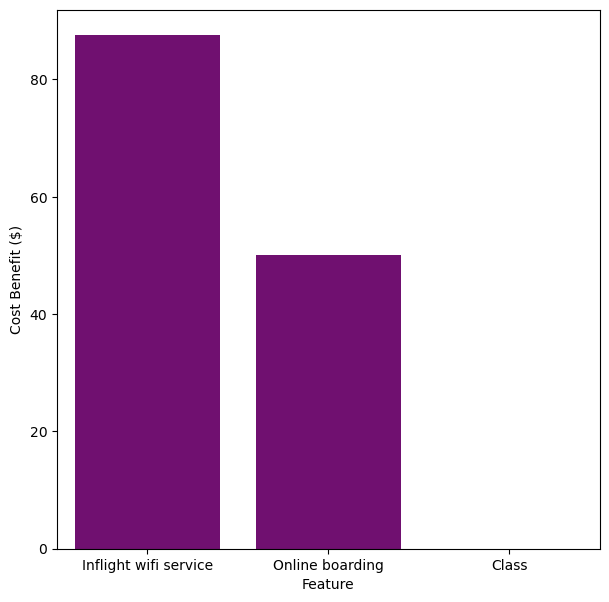

In [145]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_1_class, color='purple')

### For Age group 2(19-24): Random Forest Classifier 

In [146]:
X = age_2.drop(['satisfaction'], axis = 1) 
y = age_2['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

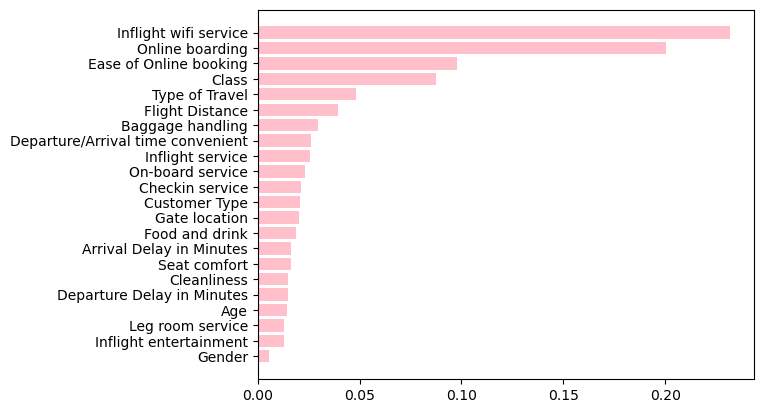

In [147]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [148]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Customer Type',
 'Age',
 'Inflight entertainment',
 'Leg room service']

In [149]:
#training data again with the removed features
X = age_2.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_2['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

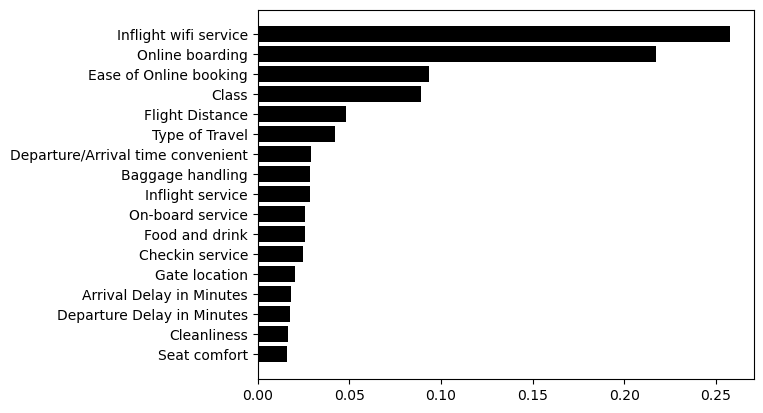

In [150]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [151]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [152]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_2_class = pd.DataFrame(table_data, columns=table_head)
results_age_2_class["Cost Benefit ($)"] = results_age_2_class["Total Profit ($)"]/results_age_2_class["Total Cost ($)"]
results_age_2_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,30000,60,375.000000
1,Online boarding,1,70,60500,121,864.285714
2,Ease of Online booking,1,60,70000,140,1166.666667


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

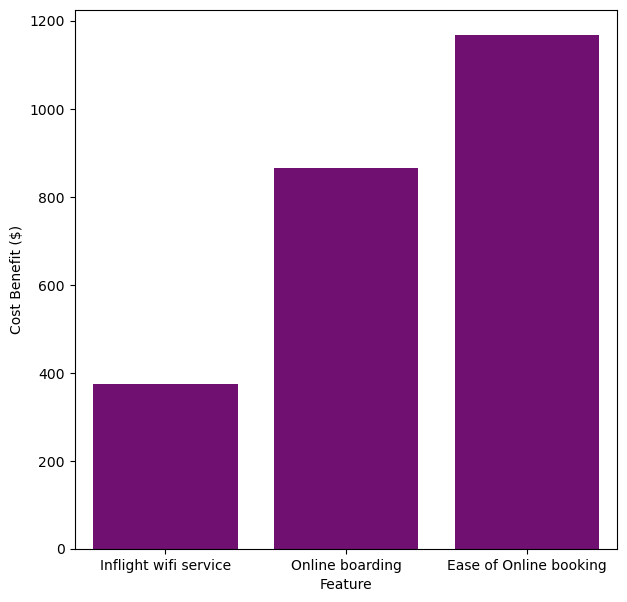

In [153]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_2_class, color='purple')

### For Age group 3(25-34): Random Forest Classifier 

In [154]:
X = age_3.drop(['satisfaction'], axis = 1) 
y = age_3['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

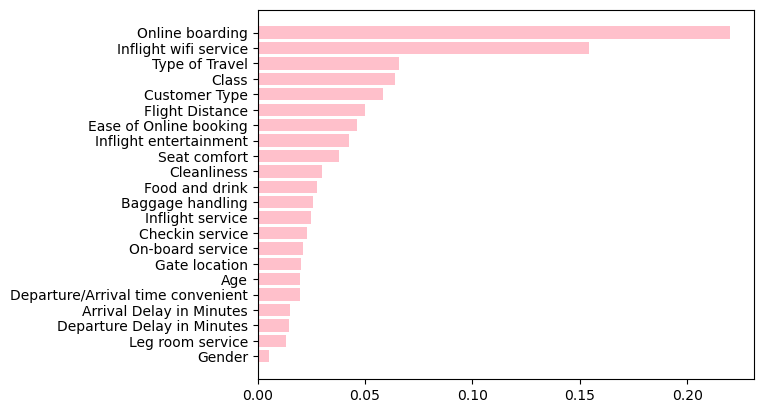

In [155]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [156]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Leg room service',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [157]:
#training data again with the removed features
X = age_3.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_3['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

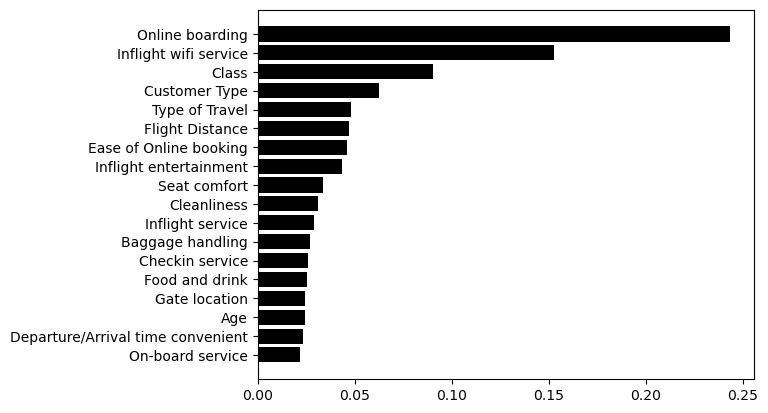

In [158]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [159]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [160]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_3_class = pd.DataFrame(table_data, columns=table_head)
results_age_3_class["Cost Benefit ($)"] = results_age_3_class["Total Profit ($)"]/results_age_3_class["Total Cost ($)"]
results_age_3_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Online boarding,1,70,49000,98,700.0
1,Inflight wifi service,1,80,82000,164,1025.0
2,Class,1,0,47500,95,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

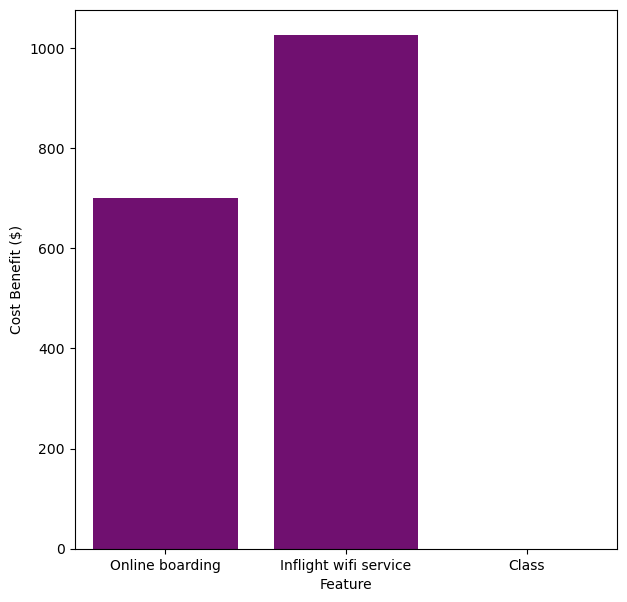

In [161]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_3_class, color='purple')

### For Age group 4(35-44): Random Forest Classifier

In [162]:
X = age_4.drop(['satisfaction'], axis = 1) 
y = age_4['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

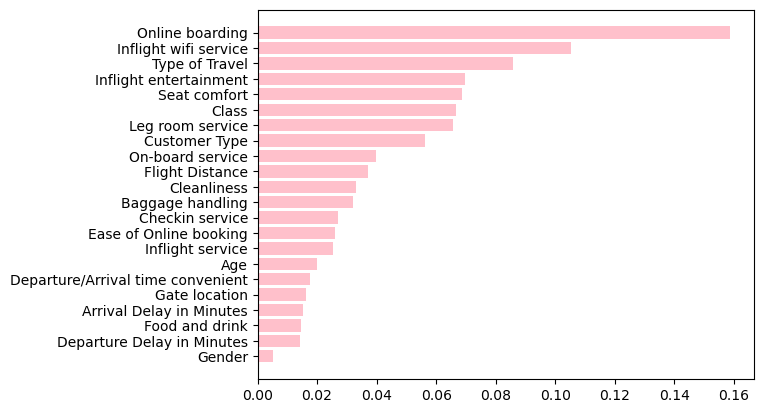

In [163]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [164]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Food and drink',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [165]:
#training data again with the removed features
X = age_4.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_4['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

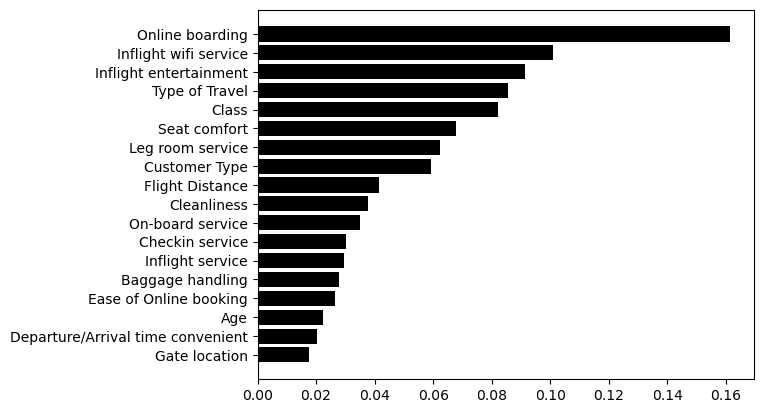

In [166]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [167]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [168]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_4_class = pd.DataFrame(table_data, columns=table_head)
results_age_4_class["Cost Benefit ($)"] = results_age_4_class["Total Profit ($)"]/results_age_4_class["Total Cost ($)"]
results_age_4_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Online boarding,1,70,75000,150,1071.428571
1,Inflight wifi service,1,80,71500,143,893.750000
2,Inflight entertainment,1,50,58000,116,1160.000000


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

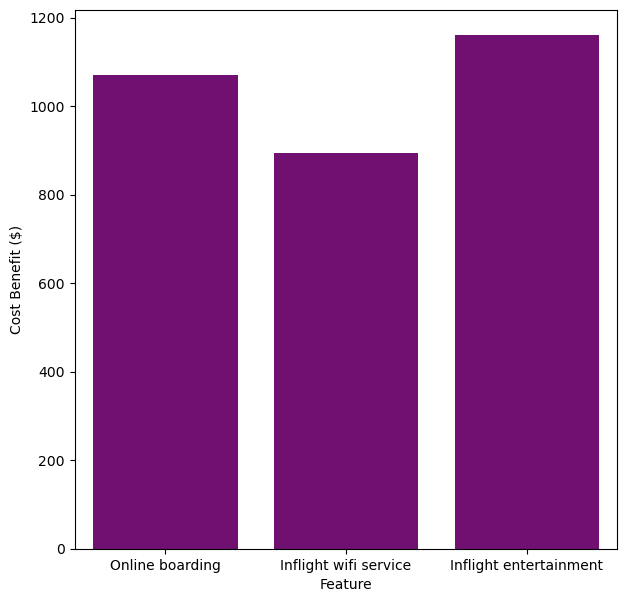

In [169]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_4_class, color='purple')

### For Age group 5(45-54): Random Forest Classifier

In [170]:
X = age_5.drop(['satisfaction'], axis = 1) 
y = age_5['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

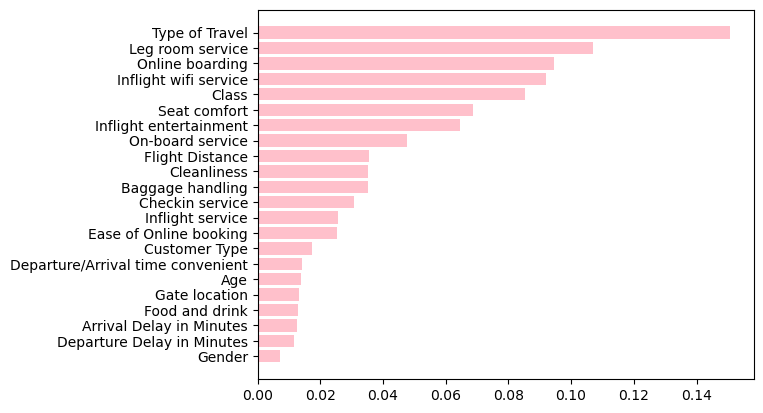

In [171]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [172]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Age',
 'Gate location',
 'Food and drink',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [173]:
#training data again with the removed features
X = age_5.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_5['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

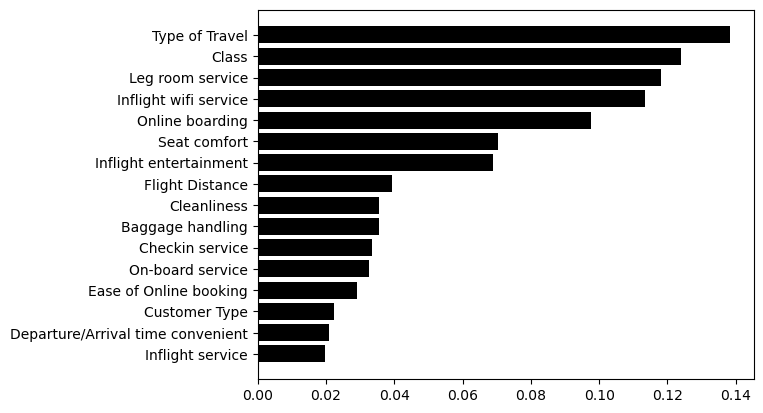

In [174]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [175]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [176]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_5_class = pd.DataFrame(table_data, columns=table_head)
results_age_5_class["Cost Benefit ($)"] = results_age_5_class["Total Profit ($)"]/results_age_5_class["Total Cost ($)"]
results_age_5_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Type of Travel,1,0,11000,22,inf
1,Class,1,0,52000,104,inf
2,Leg room service,1,500,32500,65,65.0


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

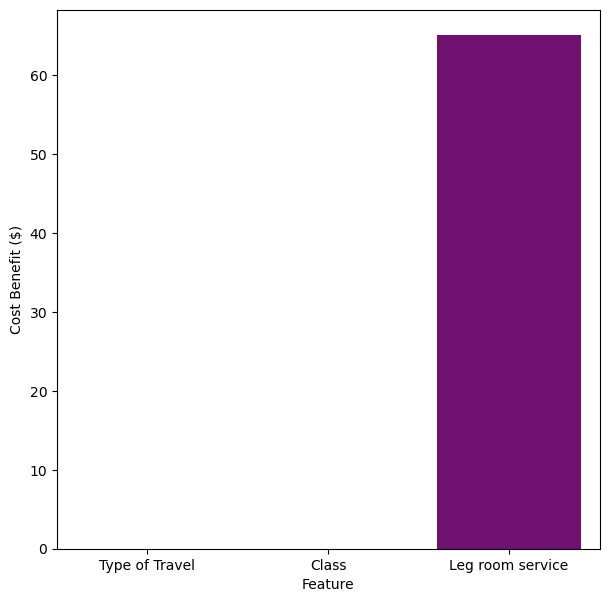

In [177]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_5_class, color='purple')

### For Age group 6(55-64): Gradient Boosting Classifier

In [178]:
X = age_6.drop(['satisfaction'], axis = 1) 
y = age_6['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

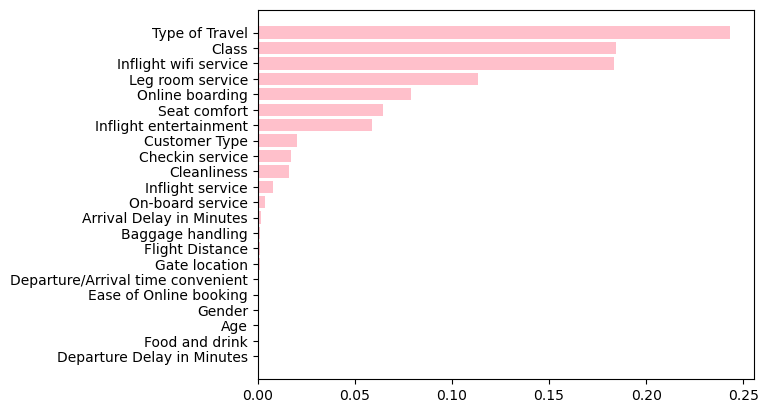

In [179]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [180]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Departure Delay in Minutes']

In [181]:
#training data again with the removed features
X = age_6.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_6['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

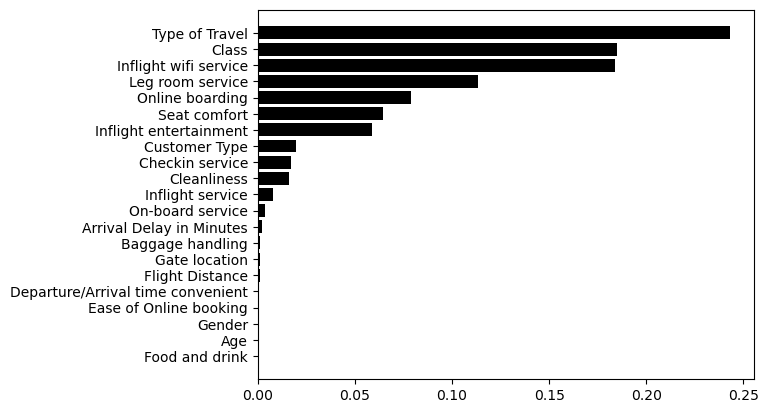

In [182]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [183]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [184]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_6_class = pd.DataFrame(table_data, columns=table_head)
results_age_6_class["Cost Benefit ($)"] = results_age_6_class["Total Profit ($)"]/results_age_6_class["Total Cost ($)"]
results_age_6_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Type of Travel,1,0,3000,6,inf
1,Class,1,0,38500,77,inf
2,Inflight wifi service,1,80,21500,43,268.75


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

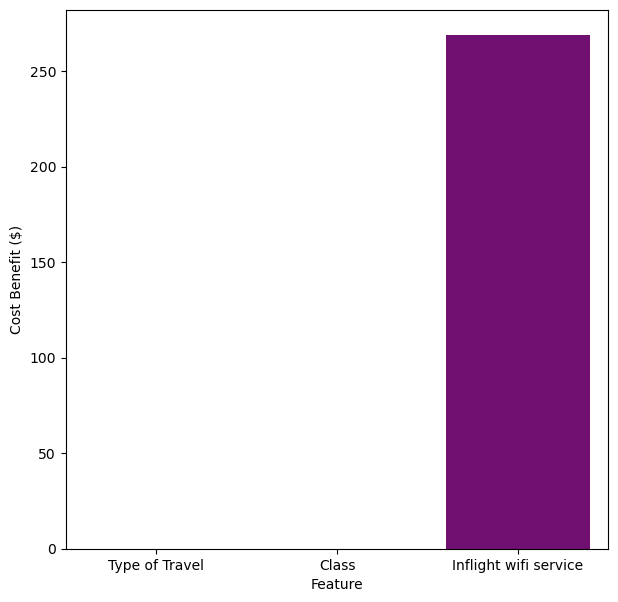

In [185]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_6_class, color='purple')

### For Age group 7(above 65): Gradient Boosting Classifier

In [186]:
X = age_7.drop(['satisfaction'], axis = 1) 
y = age_7['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

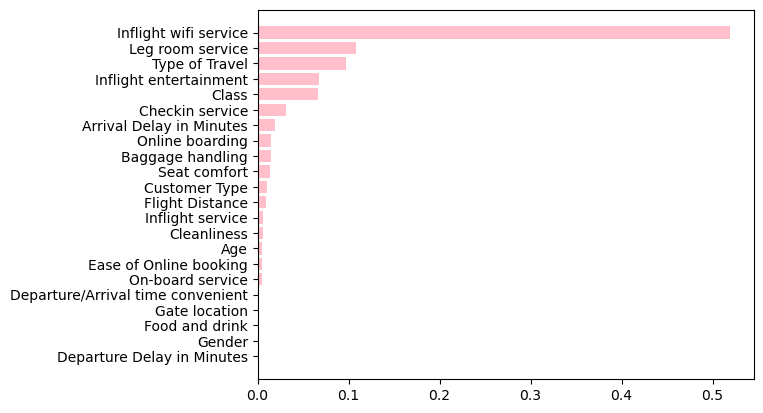

In [187]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [188]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Departure Delay in Minutes']

In [189]:
#training data again with the removed features
X = age_7.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = age_7['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

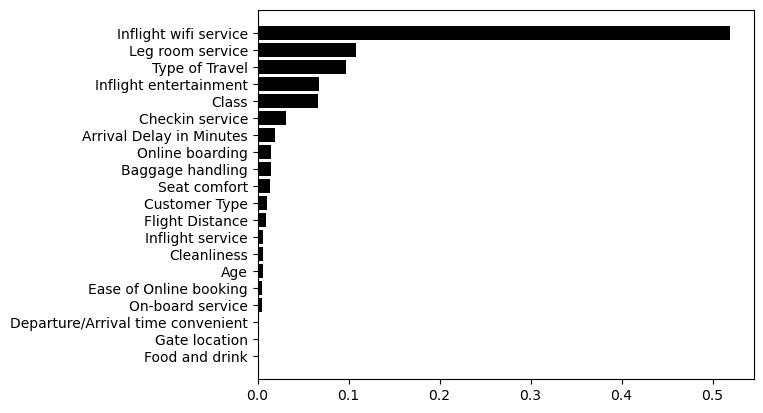

In [190]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [191]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [192]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_age_7_class = pd.DataFrame(table_data, columns=table_head)
results_age_7_class["Cost Benefit ($)"] = results_age_7_class["Total Profit ($)"]/results_age_7_class["Total Cost ($)"]
results_age_7_class

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,5000,10,62.5
1,Leg room service,1,500,5000,10,10.0
2,Type of Travel,1,0,4000,8,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

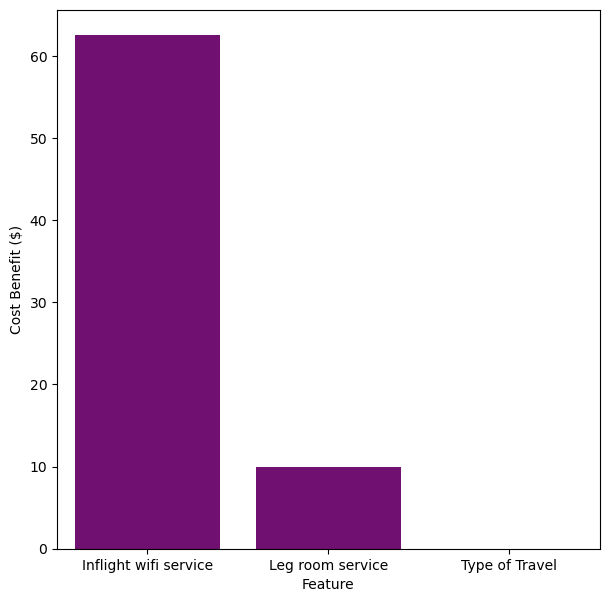

In [193]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_age_7_class, color='purple')

## For Type of Travel

### For Business Travel: Random Forest Classifier 

In [194]:
X = btravel.drop(['satisfaction'], axis = 1) 
y = btravel['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

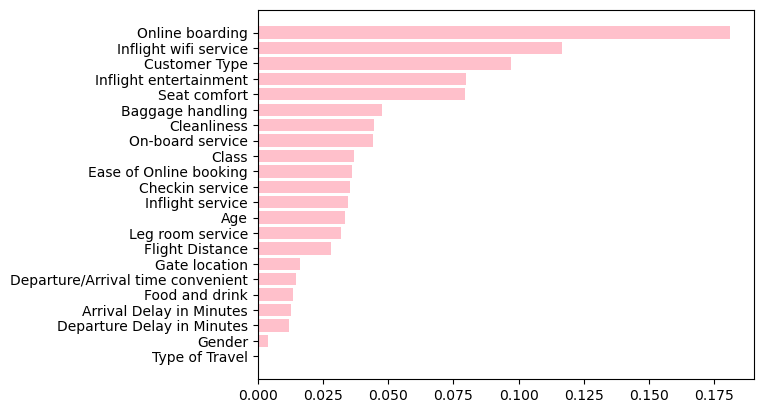

In [195]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [196]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Type of Travel', 'Food and drink', 'Departure Delay in Minutes']

In [197]:
#training data again with the removed features
X = btravel.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = btravel['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

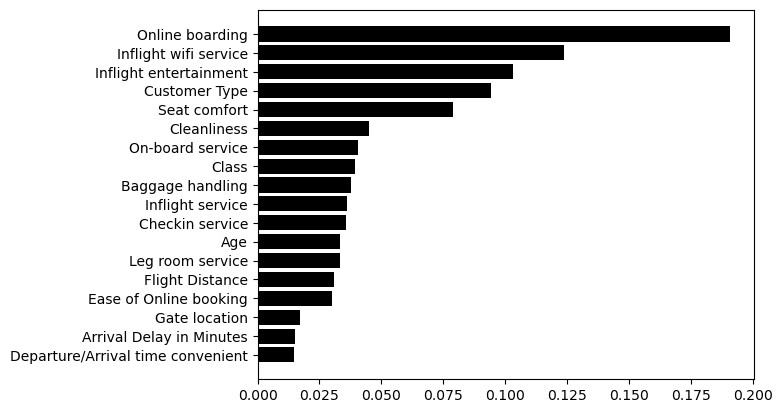

In [198]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [199]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [200]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_btravel = pd.DataFrame(table_data, columns=table_head)
results_btravel["Cost Benefit ($)"] = results_btravel["Total Profit ($)"]/results_btravel["Total Cost ($)"]
results_btravel

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Online boarding,1,70,347000,694,4957.142857
1,Inflight wifi service,1,80,403000,806,5037.500000
2,Inflight entertainment,1,50,254000,508,5080.000000


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

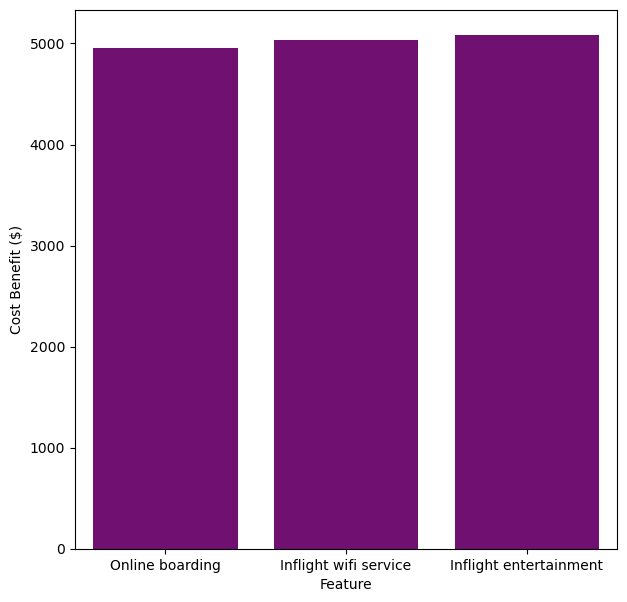

In [201]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_btravel, color='purple')

### For Personal Travel: Gradient Boosting Classifier

In [202]:
X = ptravel.drop(['satisfaction'], axis = 1) #dropping no common class for non important stuff
y = ptravel['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

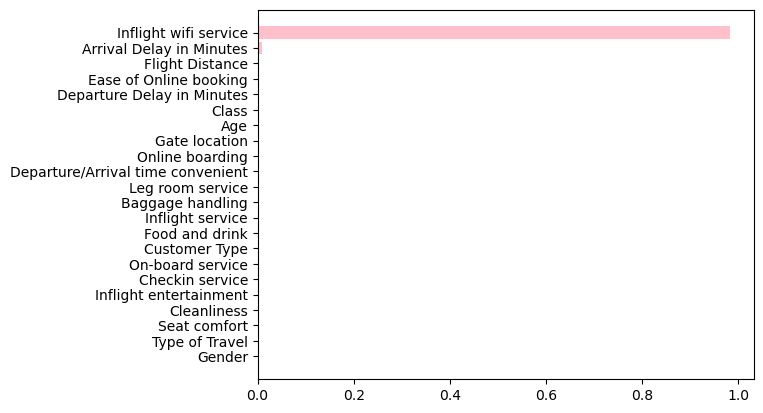

In [203]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [204]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender']

In [205]:
#training data again with the removed features
X = ptravel.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = ptravel['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

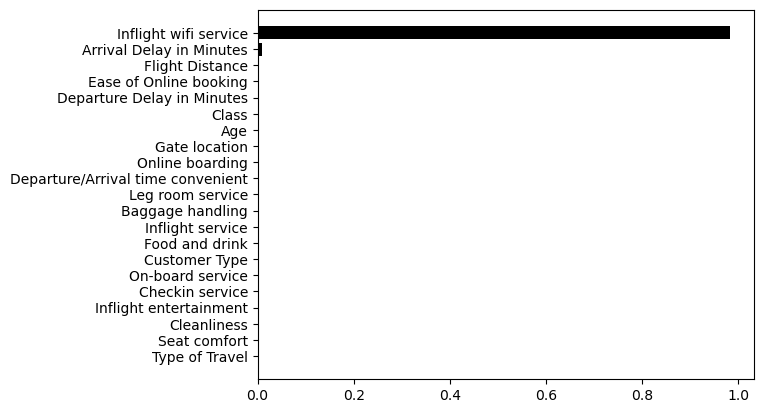

In [206]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [207]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [208]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_ptravel = pd.DataFrame(table_data, columns=table_head)
results_ptravel["Cost Benefit ($)"] = results_ptravel["Total Profit ($)"]/results_ptravel["Total Cost ($)"]
results_ptravel

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,0,0,0.0
1,Arrival Delay in Minutes,1,0,0,0,NaN
2,Flight Distance,1,400,21000,42,52.5


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

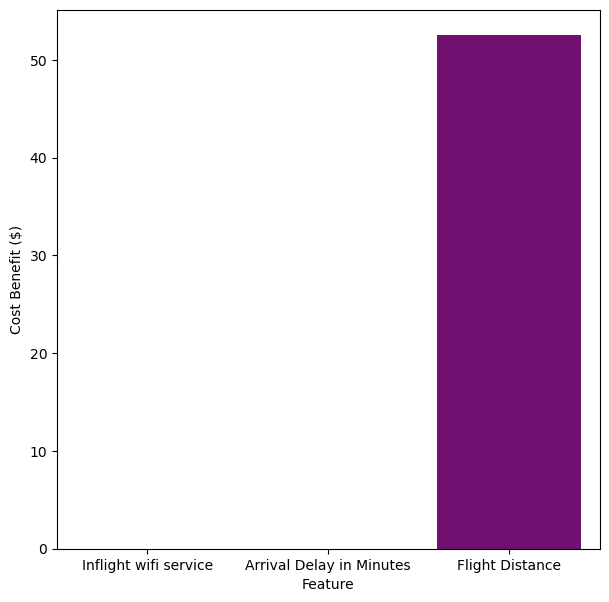

In [209]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_ptravel, color='purple')

## For Type of Customer

### For Loyal Customer: Random Forest Classifier 

In [210]:
X = loyal.drop(['satisfaction'], axis = 1) 
y = loyal['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

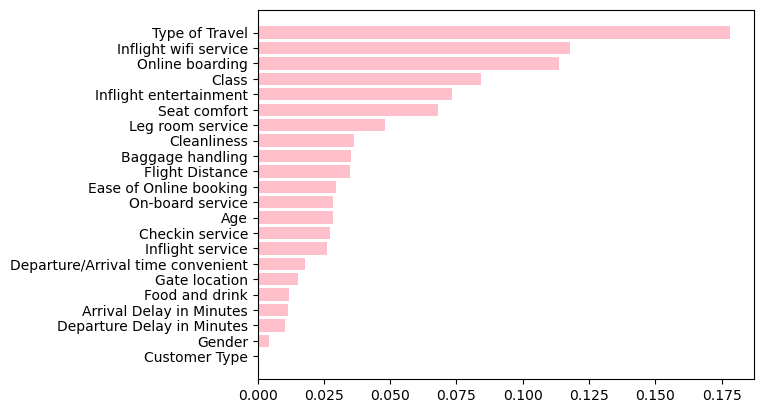

In [211]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [212]:
#recursive feature elimination 
rfe = RFECV(rf,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender',
 'Customer Type',
 'Food and drink',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [213]:
#training data again with the removed features
X = loyal.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = loyal['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

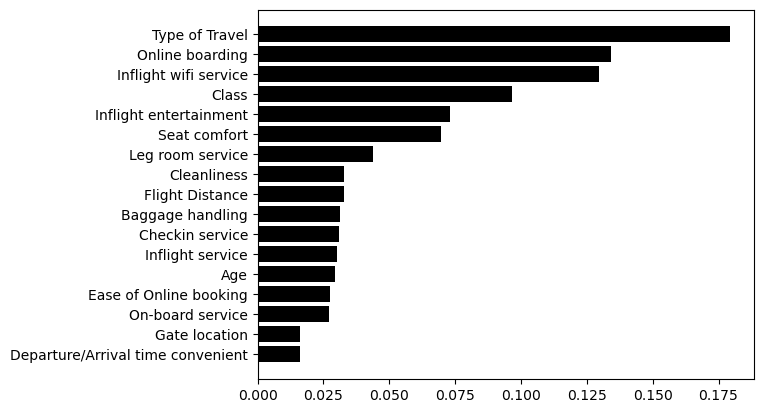

In [214]:
#training model using new infor
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
features = X.columns

#plot
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [215]:
#intital predictions
initial_predictions = rf.predict(X_test)

In [216]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = rf.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_loyal = pd.DataFrame(table_data, columns=table_head)
results_loyal["Cost Benefit ($)"] = results_loyal["Total Profit ($)"]/results_loyal["Total Cost ($)"]
results_loyal

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Type of Travel,1,0,32000,64,inf
1,Online boarding,1,70,210500,421,3007.142857
2,Inflight wifi service,1,80,374500,749,4681.250000


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

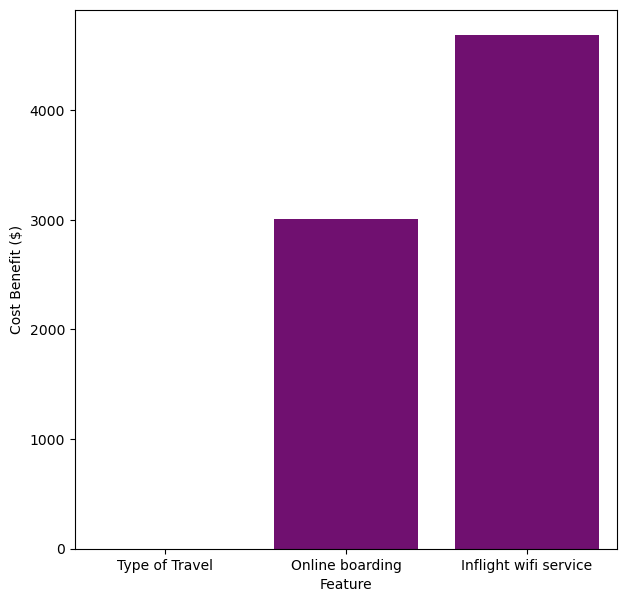

In [217]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_loyal, color='purple')

### For Disloyal Customer: Gradient Boosting Classifier

In [218]:
X = disloyal.drop(['satisfaction'], axis = 1) #dropping no common class for non important stuff
y = disloyal['satisfaction']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

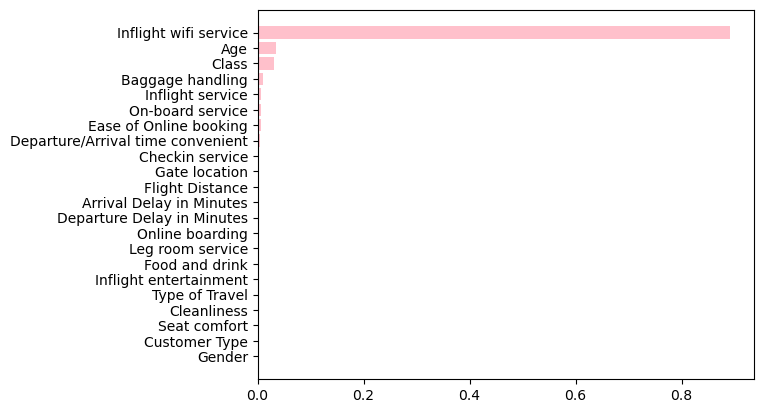

In [219]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train,y_train)

#checking current feature importances
features = X.columns


f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'pink')
plt.show()

In [220]:
#recursive feature elimination 
rfe = RFECV(gb,cv = 2,scoring = "neg_mean_squared_error")
rfe.fit(X_train,y_train)

#to check for columns that have been removed
selected_features = np.array(features)[rfe.get_support()]
features = X_test.columns
no_common = [value for value in features if value not in selected_features]
no_common

['Gender', 'Customer Type', 'Type of Travel', 'Seat comfort', 'Cleanliness']

In [221]:
#training data again with the removed features
X = disloyal.drop(['satisfaction'] + no_common, axis = 1) #dropping no common class for non important stuff
y = disloyal['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) #40% test

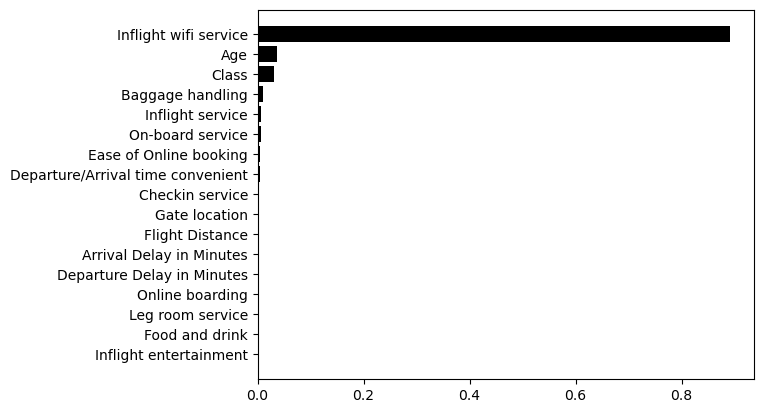

In [222]:
#training model using new infor
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42).fit(X_train, y_train)
features = X.columns

#plot
f_i = list(zip(features,gb.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = 'k')
plt.show()

In [223]:
#intital predictions
initial_predictions = gb.predict(X_test)

In [224]:
#selecting top 3 features that have higher importance in model
top3 = [f[0] for f in sorted(f_i, key=lambda x: x[1], reverse=True)[:3]] 
excluded = no_common #exluding columns that are removed with recursive feature elimination
increased_values = 1 #increasing satisfaction by 1
profits = [] #to store profits
table_data = []

for feature in top3:
    X_test_increase = X_test.copy()
    total_cost = 0

    if feature not in excluded:
        X_test_increase[feature] = X_test_increase[feature].apply(lambda x: min(x + increased_values, max_value))
        cost = costs.get(feature, 0) * increased_values
        total_cost += cost

    y_pred_increase_new = gb.predict(X_test_increase) #new predictions
    
    changed = sum((y_test == 0) & (y_pred_increase_new == 1)) #to see how many changed from dissatisfied to satisfied
    profit = profit_per_change * changed #profit per changed customer
    profits.append(profit)
    table_data.append([feature, increased_values, total_cost, profit, changed])

table_head = ["Feature", "Increased Value", "Total Cost ($)", "Total Profit ($)", "Number of Changes"]
results_disloyal = pd.DataFrame(table_data, columns=table_head)
results_disloyal["Cost Benefit ($)"] = results_disloyal["Total Profit ($)"]/results_disloyal["Total Cost ($)"]
results_disloyal

,Feature,Increased Value,Total Cost ($),Total Profit ($),Number of Changes,Cost Benefit ($)
0,Inflight wifi service,1,80,0,0,0.0
1,Age,1,0,185000,370,inf
2,Class,1,0,60000,120,inf


<Axes: xlabel='Feature', ylabel='Cost Benefit ($)'>

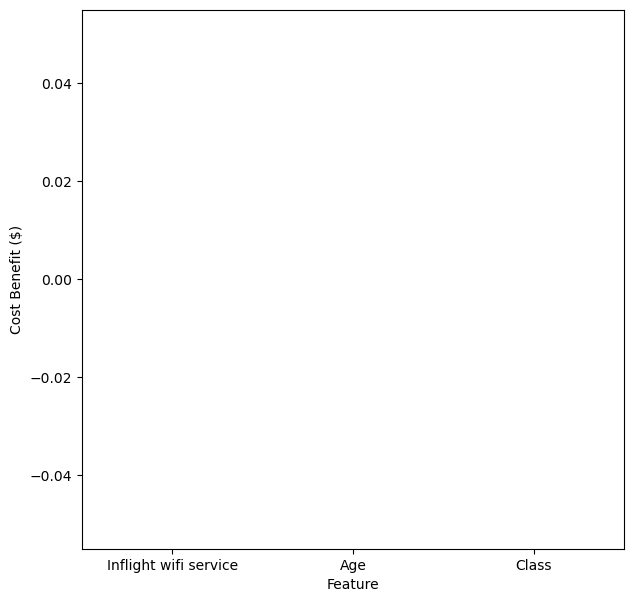

In [225]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Feature', y='Cost Benefit ($)', data = results_disloyal, color='purple')

# Other visualizations

## Total profits over different Classes

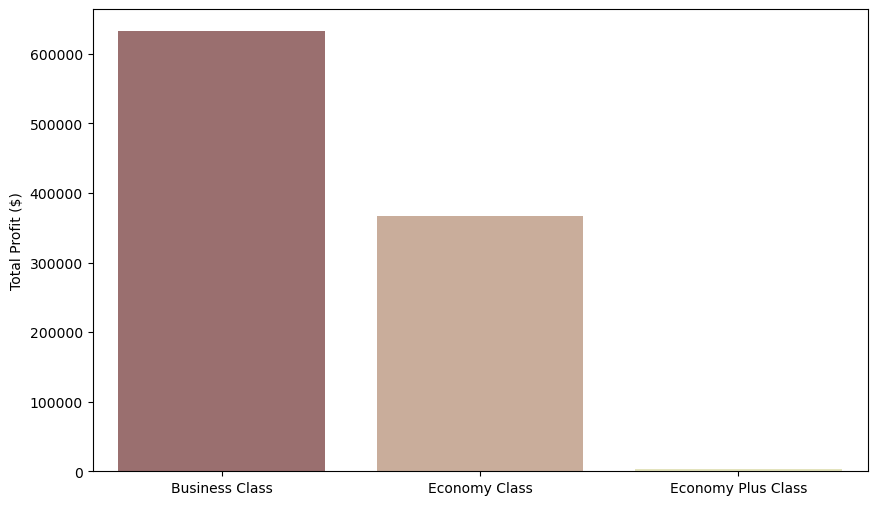

In [226]:
total_profit_business_class = results_business_class["Total Profit ($)"].sum()
total_profit_economy_class = results_economy_class["Total Profit ($)"].sum()
total__economy_plus_class = results_economy_plus_class["Total Profit ($)"].sum()

profits = [total_profit_business_class, total_profit_economy_class, total__economy_plus_class]
labels = ["Business Class", "Economy Class", "Economy Plus Class"]

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = profits, palette = "pink")
plt.ylabel("Total Profit ($)")
plt.show()

## Total profits over different Genders

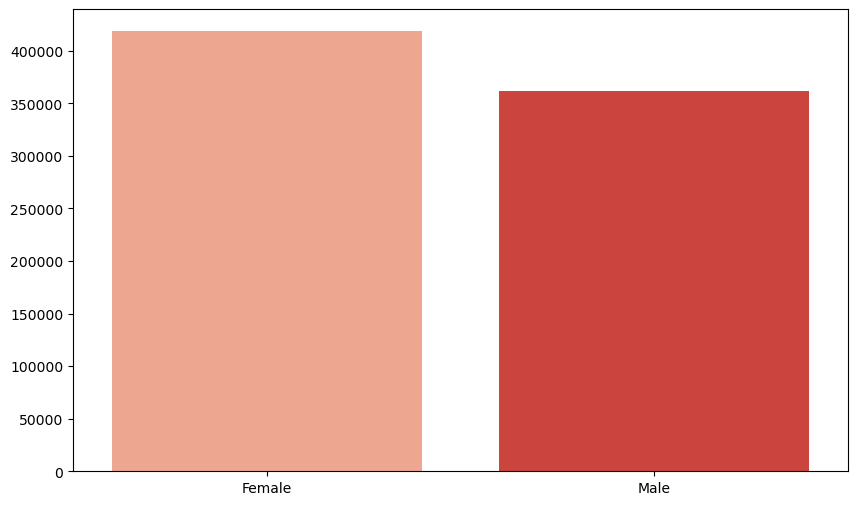

In [227]:
total_profit_female = results_female_class["Total Profit ($)"].sum()
total_profit_male = results_male_class["Total Profit ($)"].sum()

profits = [total_profit_female, total_profit_male]
labels = ["Female", "Male"]

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = profits, palette = "Reds")
plt.show()

## Total profits over different Age groups

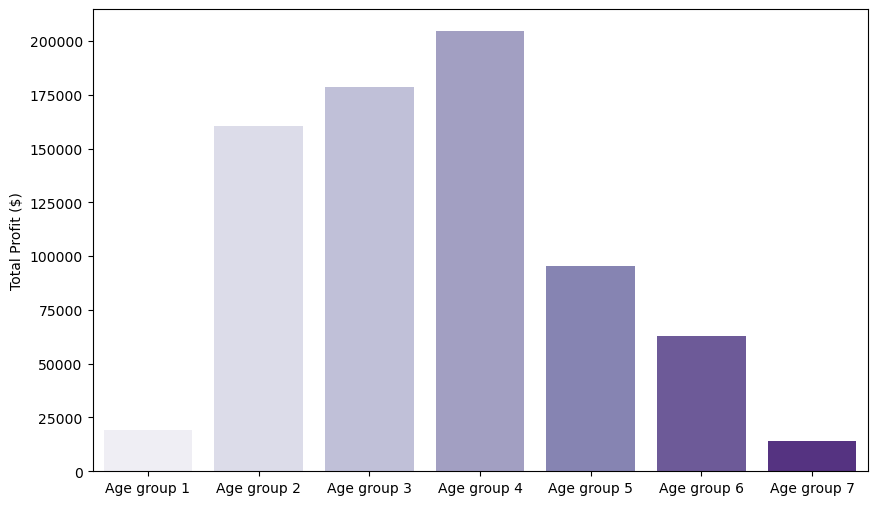

In [228]:
total_profit_age1 = results_age_1_class["Total Profit ($)"].sum()
total_profit_age2 = results_age_2_class["Total Profit ($)"].sum()
total_profit_age3 = results_age_3_class["Total Profit ($)"].sum()
total_profit_age4 = results_age_4_class["Total Profit ($)"].sum()
total_profit_age5 = results_age_5_class["Total Profit ($)"].sum()
total_profit_age6 = results_age_6_class["Total Profit ($)"].sum()
total_profit_age7 = results_age_7_class["Total Profit ($)"].sum()

profits = [total_profit_age1, total_profit_age2, total_profit_age3, total_profit_age4, total_profit_age5, total_profit_age6, 
           total_profit_age7]
labels = ["Age group 1", "Age group 2", "Age group 3", "Age group 4", "Age group 5", "Age group 6", "Age group 7"]

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = profits, palette = "Purples")
plt.ylabel("Total Profit ($)")
plt.show()

## Total profits over different Type of Travel

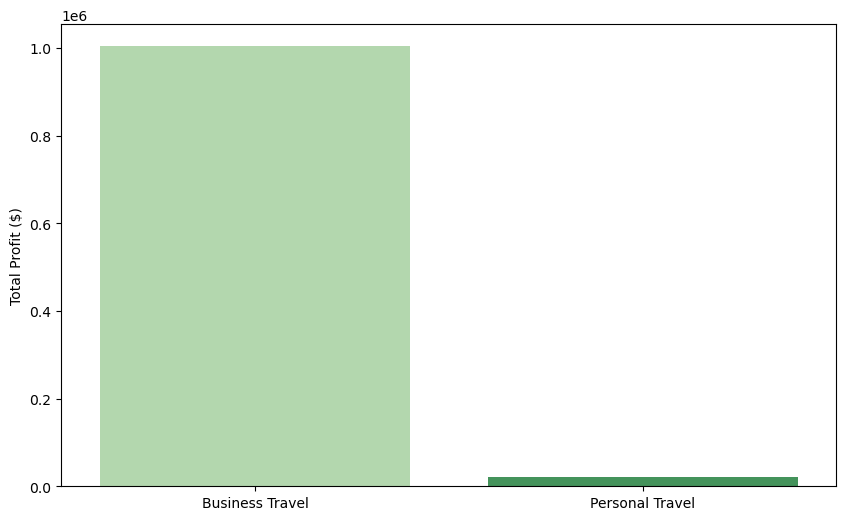

In [230]:
total_profit_btravel = results_btravel["Total Profit ($)"].sum()
total_profit_ptravel = results_ptravel["Total Profit ($)"].sum()

profits = [total_profit_btravel, total_profit_ptravel]
labels = ["Business Travel", "Personal Travel"]

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = profits, palette = "Greens")
plt.ylabel("Total Profit ($)")
plt.show()

## Total profits over different Type of Travel

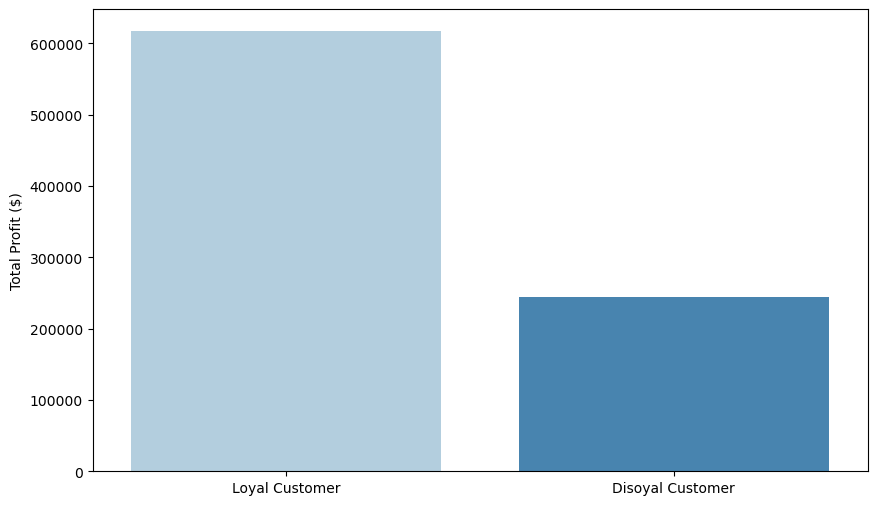

In [231]:
total_profit_loyal = results_loyal["Total Profit ($)"].sum()
total_profit_disloyal = results_disloyal["Total Profit ($)"].sum()

profits = [total_profit_loyal, total_profit_disloyal]
labels = ["Loyal Customer", "Disoyal Customer"]

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = profits, palette = "Blues")
plt.ylabel("Total Profit ($)")
plt.show()

## Overall Profits for different Features

In [232]:
#combining results
all_results = pd.concat([results_business_class, results_economy_class, results_economy_plus_class,
                         results_female_class, results_male_class, 
                         results_age_1_class, results_age_2_class, results_age_3_class, results_age_4_class, 
                         results_age_5_class, results_age_6_class, results_age_7_class,
                         results_btravel, results_ptravel,
                         results_loyal, results_disloyal])

all_results = all_results.groupby('Feature').sum().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


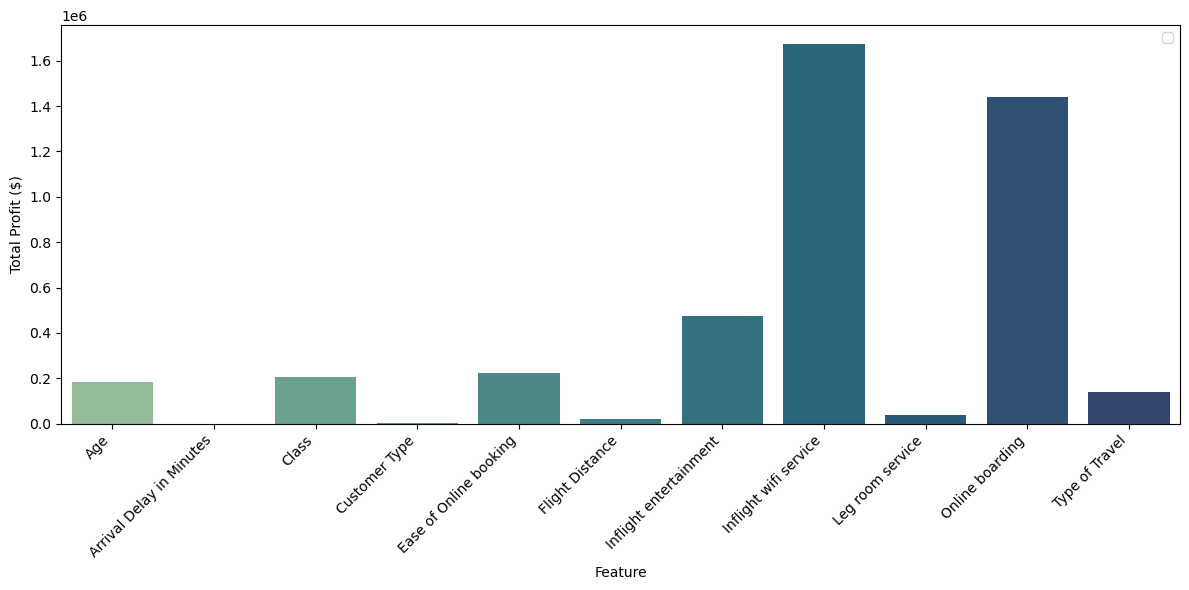

In [233]:
plt.figure(figsize=(12, 6))
sns.barplot(x ='Feature', y ='Total Profit ($)', data = all_results, palette = 'crest')
plt.xticks(rotation=45, ha ='right')
plt.legend()
plt.tight_layout()
plt.show()

## Overall Costs Benefit for different Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


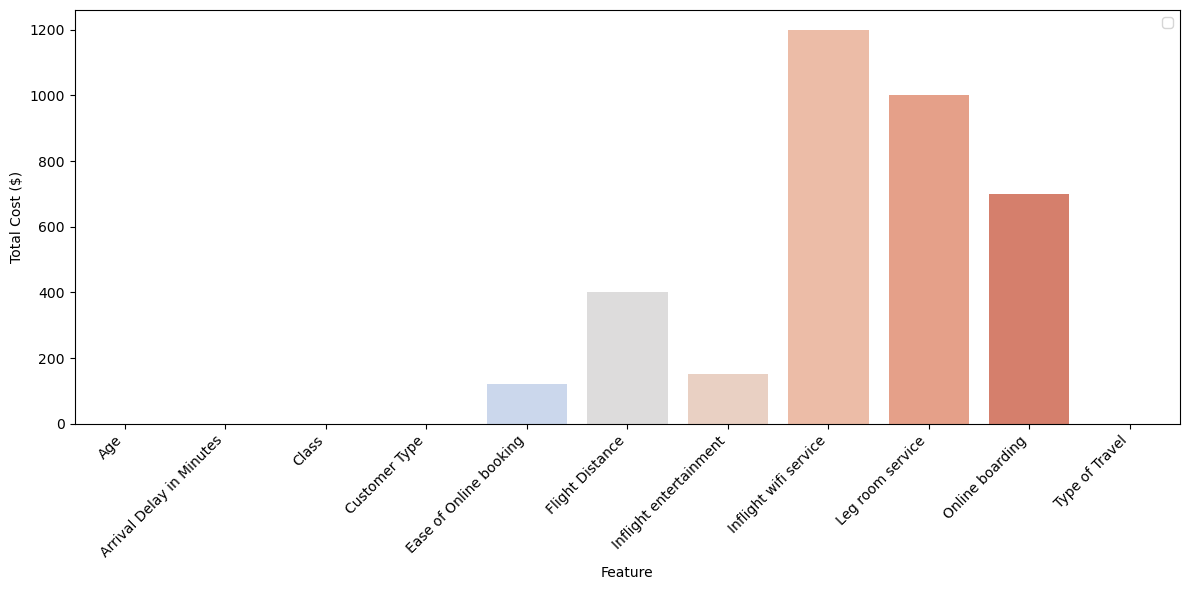

In [234]:
plt.figure(figsize=(12, 6))
sns.barplot(x ='Feature', y ='Total Cost ($)', data = all_results, palette = 'coolwarm')
plt.xticks(rotation=45, ha ='right')
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


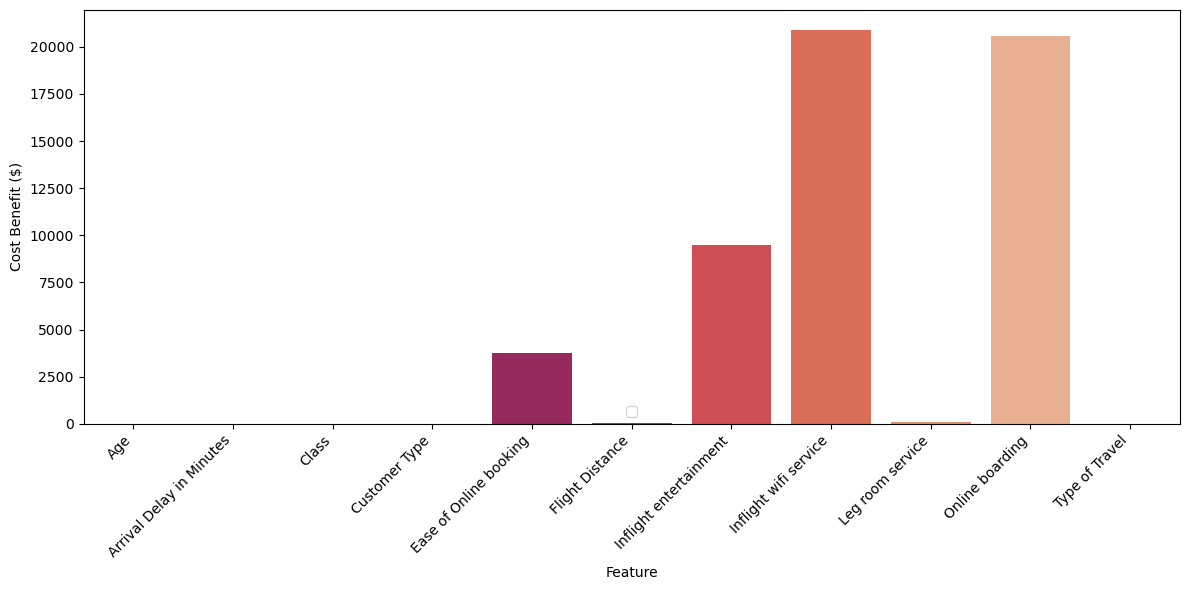

In [235]:
#combining results
all_results = pd.concat([results_business_class, results_economy_class, results_economy_plus_class,
                         results_female_class, results_male_class, 
                         results_age_1_class, results_age_2_class, results_age_3_class, results_age_4_class, 
                         results_age_5_class, results_age_6_class, results_age_7_class,
                         results_btravel, results_ptravel,
                         results_loyal, results_disloyal])

all_results = all_results.groupby('Feature').sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x ='Feature', y ='Cost Benefit ($)', data = all_results, palette = 'rocket')
plt.xticks(rotation=45, ha ='right')
plt.legend()
plt.tight_layout()
plt.show()